In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


# Data Fields

- **datetime**: Hourly date + timestamp  
- **season**: 
  - 1 = Spring
  - 2 = Summer
  - 3 = Fall
  - 4 = Winter
- **holiday**: Whether the day is considered a holiday
- **workingday**: Whether the day is neither a weekend nor holiday
- **weather**: 
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**: Temperature in Celsius
- **atemp**: "Feels like" temperature in Celsius
- **humidity**: Relative humidity
- **windspeed**: Wind speed
- **casual**: Number of non-registered user rentals initiated
- **registered**: Number of registered user rentals initiated
- **count**: Number of total rentals


In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/pranav385/BikeRentalPrediction/refs/heads/main/Bike%20Rent.csv')
data.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
data.shape

(10886, 12)

In [6]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['season'] = data['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
data['weather'] = data['weather'].map({1:'One', 2:'Two', 3:'Three', 4:'Four'})
data.head()

datetime  season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00  Spring        0           0     One  9.84  14.395   
1 2011-01-01 01:00:00  Spring        0           0     One  9.02  13.635   
2 2011-01-01 02:00:00  Spring        0           0     One  9.02  13.635   
3 2011-01-01 03:00:00  Spring        0           0     One  9.84  14.395   
4 2011-01-01 04:00:00  Spring        0           0     One  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(2)
memory usage: 1020.7+ KB


In [8]:
data['Year'] = data['datetime'].dt.year
data['Months'] = data['datetime'].dt.month
data['Days'] = data['datetime'].dt.day
data['Hour'] = data['datetime'].dt.hour
data['Year-Month'] = data['datetime'].dt.to_period('M')
data.head()

datetime  season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00  Spring        0           0     One  9.84  14.395   
1 2011-01-01 01:00:00  Spring        0           0     One  9.02  13.635   
2 2011-01-01 02:00:00  Spring        0           0     One  9.02  13.635   
3 2011-01-01 03:00:00  Spring        0           0     One  9.84  14.395   
4 2011-01-01 04:00:00  Spring        0           0     One  9.84  14.395   

   humidity  windspeed  casual  registered  count  Year  Months  Days  Hour  \
0        81        0.0       3          13     16  2011       1     1     0   
1        80        0.0       8          32     40  2011       1     1     1   
2        80        0.0       5          27     32  2011       1     1     2   
3        75        0.0       3          10     13  2011       1     1     3   
4        75        0.0       0           1      1  2011       1     1     4   

  Year-Month  
0    2011-01  
1    2011-01  
2    2011-01  
3    2011-01  
4    2011-01

In [9]:
data.drop(['casual', 'registered'], axis=1, inplace=True)
data.head(2)

datetime  season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00  Spring        0           0     One  9.84  14.395   
1 2011-01-01 01:00:00  Spring        0           0     One  9.02  13.635   

   humidity  windspeed  count  Year  Months  Days  Hour Year-Month  
0        81        0.0     16  2011       1     1     0    2011-01  
1        80        0.0     40  2011       1     1     1    2011-01

## Now we will do Data Pre-Processing

In [11]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
Year          0
Months        0
Days          0
Hour          0
Year-Month    0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data.describe(include='all')

datetime  season       holiday    workingday  \
count                           10886   10886  10886.000000  10886.000000   
unique                            NaN       4           NaN           NaN   
top                               NaN  Winter           NaN           NaN   
freq                              NaN    2734           NaN           NaN   
mean    2011-12-27 05:56:22.399411968     NaN      0.028569      0.680875   
min               2011-01-01 00:00:00     NaN      0.000000      0.000000   
25%               2011-07-02 07:15:00     NaN      0.000000      0.000000   
50%               2012-01-01 20:30:00     NaN      0.000000      1.000000   
75%               2012-07-01 12:45:00     NaN      0.000000      1.000000   
max               2012-12-19 23:00:00     NaN      1.000000      1.000000   
std                               NaN     NaN      0.166599      0.466159   

       weather         temp         atemp      humidity     windspeed  \
count    10886  10886.00000  10886.000000  10886.000000  10886.000000   
unique       4          NaN           NaN           NaN           NaN   
top        One          NaN           NaN           NaN           NaN   
freq      7192          NaN           NaN           NaN           NaN   
mean       NaN     20.23086     23.655084     61.886460     12.799395   
min        NaN      0.82000      0.760000      0.000000      0.000000   
25%        NaN     13.94000     16.665000     47.000000      7.001500   
50%        NaN     20.50000     24.240000     62.000000     12.998000   
75%        NaN     26.24000     31.060000     77.000000     16.997900   
max        NaN     41.00000     45.455000    100.000000     56.996900   
std        NaN      7.79159      8.474601     19.245033      8.164537   

               count          Year        Months          Days          Hour  \
count   10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      191.574132   2011.501929      6.521495      9.992559     11.541613   
min         1.000000   2011.000000      1.000000      1.000000      0.000000   
25%        42.000000   2011.000000      4.000000      5.000000      6.000000   
50%       145.000000   2012.000000      7.000000     10.000000     12.000000   
75%       284.000000   2012.000000     10.000000     15.000000     18.000000   
max       977.000000   2012.000000     12.000000     19.000000     23.000000   
std       181.144454      0.500019      3.444373      5.476608      6.915838   

       Year-Month  
count       10886  
unique         24  
top       2012-12  
freq          456  
mean          NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN  
std           NaN

In [14]:
data[data['humidity']==0]

datetime  season  holiday  workingday weather   temp   atemp  \
1091 2011-03-10 00:00:00  Spring        0           1   Three  13.94  15.910   
1092 2011-03-10 01:00:00  Spring        0           1   Three  13.94  15.910   
1093 2011-03-10 02:00:00  Spring        0           1   Three  13.94  15.910   
1094 2011-03-10 05:00:00  Spring        0           1   Three  14.76  17.425   
1095 2011-03-10 06:00:00  Spring        0           1   Three  14.76  16.665   
1096 2011-03-10 07:00:00  Spring        0           1   Three  15.58  19.695   
1097 2011-03-10 08:00:00  Spring        0           1   Three  15.58  19.695   
1098 2011-03-10 09:00:00  Spring        0           1   Three  16.40  20.455   
1099 2011-03-10 10:00:00  Spring        0           1   Three  16.40  20.455   
1100 2011-03-10 11:00:00  Spring        0           1   Three  16.40  20.455   
1101 2011-03-10 12:00:00  Spring        0           1   Three  17.22  21.210   
1102 2011-03-10 13:00:00  Spring        0           1   Three  17.22  21.210   
1103 2011-03-10 14:00:00  Spring        0           1   Three  18.04  21.970   
1104 2011-03-10 15:00:00  Spring        0           1   Three  18.04  21.970   
1105 2011-03-10 16:00:00  Spring        0           1   Three  17.22  21.210   
1106 2011-03-10 17:00:00  Spring        0           1     Two  18.04  21.970   
1107 2011-03-10 18:00:00  Spring        0           1   Three  18.04  21.970   
1108 2011-03-10 19:00:00  Spring        0           1   Three  18.04  21.970   
1109 2011-03-10 20:00:00  Spring        0           1   Three  14.76  16.665   
1110 2011-03-10 21:00:00  Spring        0           1   Three  14.76  17.425   
1111 2011-03-10 22:00:00  Spring        0           1     Two  13.94  16.665   
1112 2011-03-10 23:00:00  Spring        0           1   Three  13.94  17.425   

      humidity  windspeed  count  Year  Months  Days  Hour Year-Month  
1091         0    16.9979      3  2011       3    10     0    2011-03  
1092         0    16.9979      2  2011       3    10     1    2011-03  
1093         0    16.9979      1  2011       3    10     2    2011-03  
1094         0    12.9980      3  2011       3    10     5    2011-03  
1095         0    22.0028     12  2011       3    10     6    2011-03  
1096         0    15.0013     37  2011       3    10     7    2011-03  
1097         0    19.0012     44  2011       3    10     8    2011-03  
1098         0    15.0013     24  2011       3    10     9    2011-03  
1099         0    11.0014     17  2011       3    10    10    2011-03  
1100         0    16.9979     11  2011       3    10    11    2011-03  
1101         0    15.0013     34  2011       3    10    12    2011-03  
1102         0    15.0013     12  2011       3    10    13    2011-03  
1103         0    19.9995     12  2011       3    10    14    2011-03  
1104         0    15.0013     14  2011       3    10    15    2011-03  
1105         0    16.9979     21  2011       3    10    16    2011-03  
1106         0    26.0027    111  2011       3    10    17    2011-03  
1107         0    23.9994     82  2011       3    10    18    2011-03  
1108         0    39.0007     56  2011       3    10    19    2011-03  
1109         0    22.0028     38  2011       3    10    20    2011-03  
1110         0    15.0013     28  2011       3    10    21    2011-03  
1111         0     8.9981     34  2011       3    10    22    2011-03  
1112         0     6.0032     27  2011       3    10    23    2011-03

temp


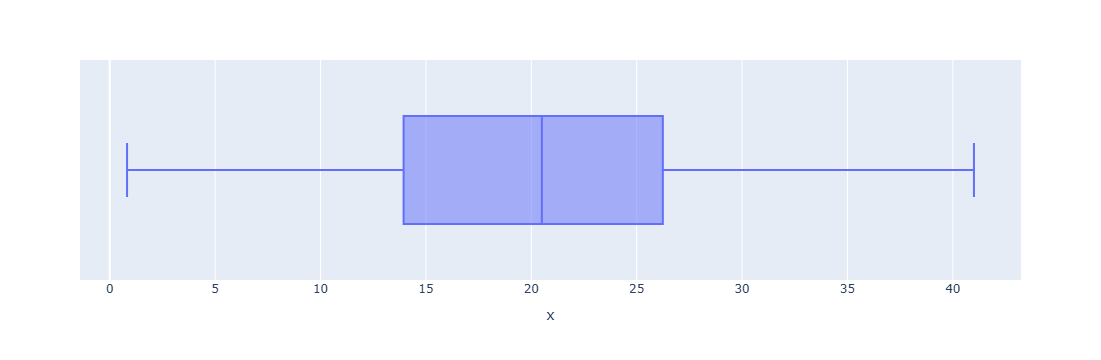

atemp


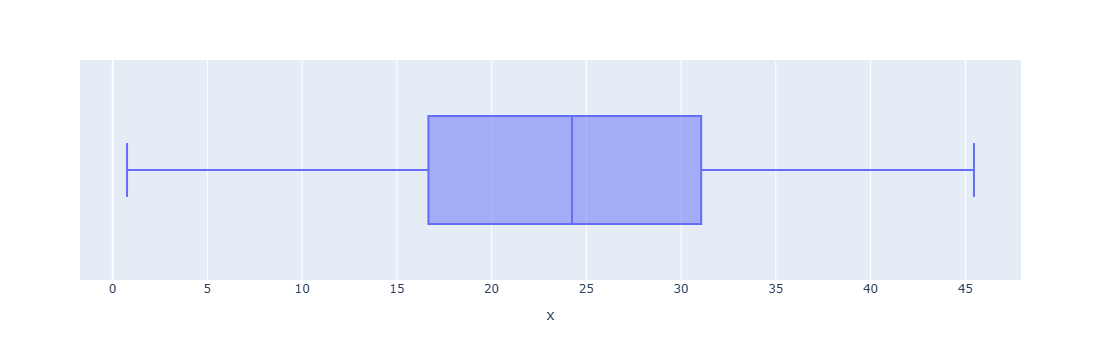

humidity


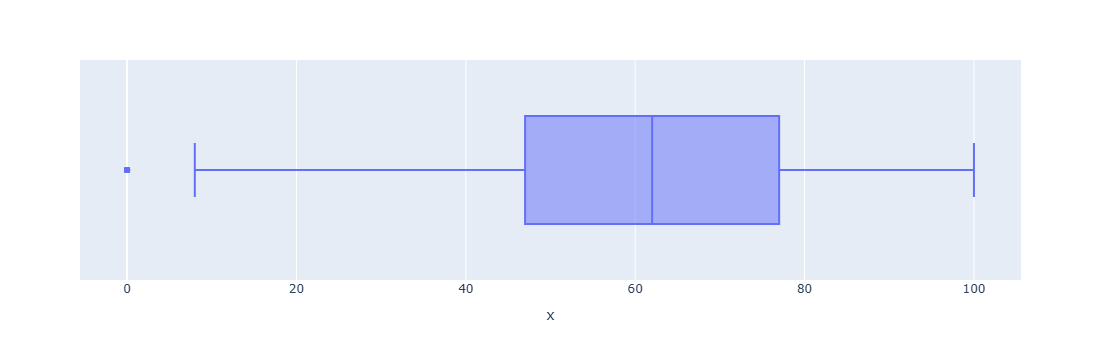

windspeed


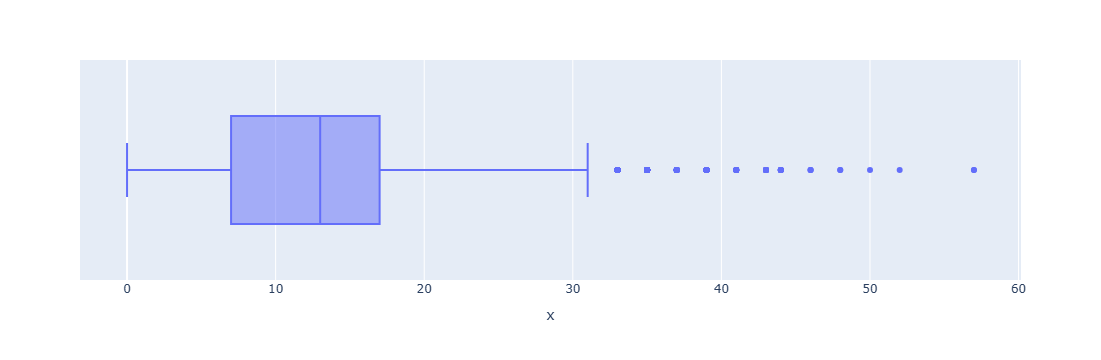

In [15]:
col = ['temp', 'atemp', 'humidity', 'windspeed']
for i in col:
    print(i)
    fig = px.box(x=data[i])
    fig.show()

### Now we treat humidity column outliers

In [17]:
Q1 = data['humidity'].quantile(0.25)
Q3 = data['humidity'].quantile(0.75)
Q1, Q3

(47.0, 77.0)

In [18]:
IQR = Q3 - Q1
IQR

30.0

In [19]:
Upper = Q3 + 1.5 * IQR
Lower = Q1 - 1.5 * IQR
Upper, Lower

(122.0, 2.0)

### These are outliers for humidity, and since we know that humidity cannot be 0 in reality, these values are likely errors or anomalies in the data.

In [21]:
data[(data['humidity']<Lower) | (data['humidity']>Upper)]

datetime  season  holiday  workingday weather   temp   atemp  \
1091 2011-03-10 00:00:00  Spring        0           1   Three  13.94  15.910   
1092 2011-03-10 01:00:00  Spring        0           1   Three  13.94  15.910   
1093 2011-03-10 02:00:00  Spring        0           1   Three  13.94  15.910   
1094 2011-03-10 05:00:00  Spring        0           1   Three  14.76  17.425   
1095 2011-03-10 06:00:00  Spring        0           1   Three  14.76  16.665   
1096 2011-03-10 07:00:00  Spring        0           1   Three  15.58  19.695   
1097 2011-03-10 08:00:00  Spring        0           1   Three  15.58  19.695   
1098 2011-03-10 09:00:00  Spring        0           1   Three  16.40  20.455   
1099 2011-03-10 10:00:00  Spring        0           1   Three  16.40  20.455   
1100 2011-03-10 11:00:00  Spring        0           1   Three  16.40  20.455   
1101 2011-03-10 12:00:00  Spring        0           1   Three  17.22  21.210   
1102 2011-03-10 13:00:00  Spring        0           1   Three  17.22  21.210   
1103 2011-03-10 14:00:00  Spring        0           1   Three  18.04  21.970   
1104 2011-03-10 15:00:00  Spring        0           1   Three  18.04  21.970   
1105 2011-03-10 16:00:00  Spring        0           1   Three  17.22  21.210   
1106 2011-03-10 17:00:00  Spring        0           1     Two  18.04  21.970   
1107 2011-03-10 18:00:00  Spring        0           1   Three  18.04  21.970   
1108 2011-03-10 19:00:00  Spring        0           1   Three  18.04  21.970   
1109 2011-03-10 20:00:00  Spring        0           1   Three  14.76  16.665   
1110 2011-03-10 21:00:00  Spring        0           1   Three  14.76  17.425   
1111 2011-03-10 22:00:00  Spring        0           1     Two  13.94  16.665   
1112 2011-03-10 23:00:00  Spring        0           1   Three  13.94  17.425   

      humidity  windspeed  count  Year  Months  Days  Hour Year-Month  
1091         0    16.9979      3  2011       3    10     0    2011-03  
1092         0    16.9979      2  2011       3    10     1    2011-03  
1093         0    16.9979      1  2011       3    10     2    2011-03  
1094         0    12.9980      3  2011       3    10     5    2011-03  
1095         0    22.0028     12  2011       3    10     6    2011-03  
1096         0    15.0013     37  2011       3    10     7    2011-03  
1097         0    19.0012     44  2011       3    10     8    2011-03  
1098         0    15.0013     24  2011       3    10     9    2011-03  
1099         0    11.0014     17  2011       3    10    10    2011-03  
1100         0    16.9979     11  2011       3    10    11    2011-03  
1101         0    15.0013     34  2011       3    10    12    2011-03  
1102         0    15.0013     12  2011       3    10    13    2011-03  
1103         0    19.9995     12  2011       3    10    14    2011-03  
1104         0    15.0013     14  2011       3    10    15    2011-03  
1105         0    16.9979     21  2011       3    10    16    2011-03  
1106         0    26.0027    111  2011       3    10    17    2011-03  
1107         0    23.9994     82  2011       3    10    18    2011-03  
1108         0    39.0007     56  2011       3    10    19    2011-03  
1109         0    22.0028     38  2011       3    10    20    2011-03  
1110         0    15.0013     28  2011       3    10    21    2011-03  
1111         0     8.9981     34  2011       3    10    22    2011-03  
1112         0     6.0032     27  2011       3    10    23    2011-03

In [22]:
data.shape

(10886, 15)

In [23]:
data = data[(data['humidity']>=Lower) & (data['humidity']<=Upper)]

In [24]:
data.shape

(10864, 15)

### Now we treat WindSpeed Cloumn Outliers

In [26]:
Q1 = data['windspeed'].quantile(0.25)
Q3 = data['windspeed'].quantile(0.75)
Q1, Q3

(7.0015, 16.9979)

In [27]:
IQR = Q3 - Q1
IQR

9.996400000000001

In [28]:
Upper = Q3 + 1.5 * IQR
Lower = Q1 - 1.5 * IQR
Upper, Lower

(31.992500000000003, -7.993100000000002)

In [29]:
data[(data['windspeed']<Lower) | (data['windspeed']>Upper)]

datetime  season  holiday  workingday weather   temp   atemp  \
175   2011-01-08 14:00:00  Spring        0           0     One   8.20   8.335   
178   2011-01-08 17:00:00  Spring        0           0     One   6.56   6.060   
194   2011-01-09 09:00:00  Spring        0           0     One   4.92   3.790   
196   2011-01-09 11:00:00  Spring        0           0     One   6.56   6.060   
265   2011-01-12 12:00:00  Spring        0           1     One   8.20   7.575   
...                   ...     ...      ...         ...     ...    ...     ...   
10013 2012-11-02 14:00:00  Winter        0           1     Two  16.40  20.455   
10154 2012-11-08 12:00:00  Winter        0           1     One  16.40  20.455   
10263 2012-11-13 01:00:00  Winter        0           1   Three  18.04  21.970   
10540 2012-12-05 14:00:00  Winter        0           1     One  19.68  23.485   
10853 2012-12-18 15:00:00  Winter        0           1     One  18.86  22.725   

       humidity  windspeed  count  Year  Months  Days  Hour Year-Month  
175          32    32.9975     95  2011       1     8    14    2011-01  
178          37    36.9974     69  2011       1     8    17    2011-01  
194          46    35.0008     19  2011       1     9     9    2011-01  
196          40    35.0008     49  2011       1     9    11    2011-01  
265          47    39.0007     55  2011       1    12    12    2011-01  
...         ...        ...    ...   ...     ...   ...   ...        ...  
10013        40    32.9975    262  2012      11     2    14    2012-11  
10154        24    32.9975    235  2012      11     8    12    2012-11  
10263        88    43.0006      5  2012      11    13     1    2012-11  
10540        33    32.9975    218  2012      12     5    14    2012-12  
10853        44    32.9975    246  2012      12    18    15    2012-12  

[226 rows x 15 columns]

### In urban areas, wind speeds typically remain below 30-35 km/h. When wind speeds exceed 35 km/h, bike rentals are highly unlikely, as such conditions pose significant safety risks and could be life-threatening. As a result, no one rents bikes under these extreme conditions.

In [31]:
data.shape

(10864, 15)

In [32]:
data = data[(data['windspeed']>=Lower) & (data['windspeed']<=Upper)]
data.shape

(10638, 15)

temp


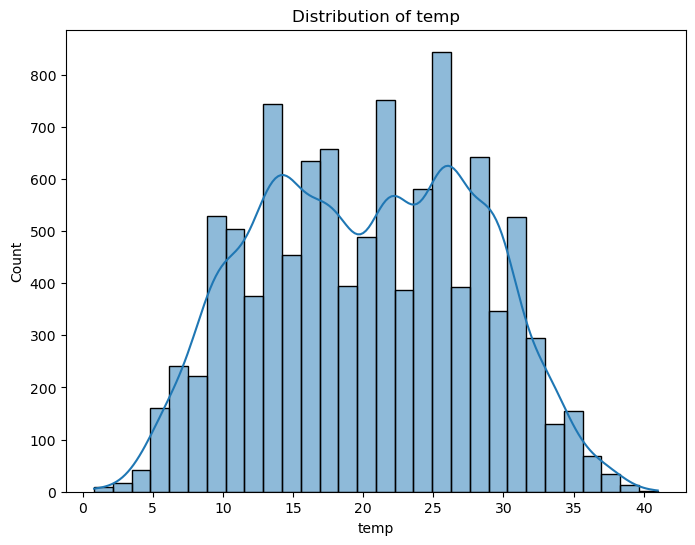

atemp


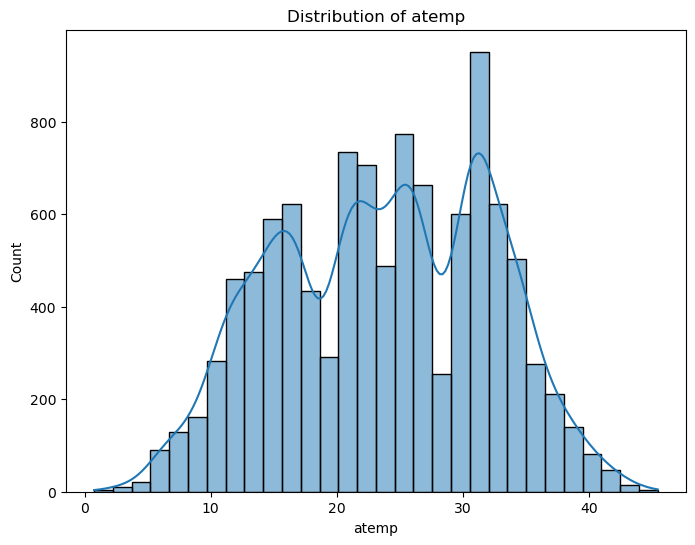

humidity


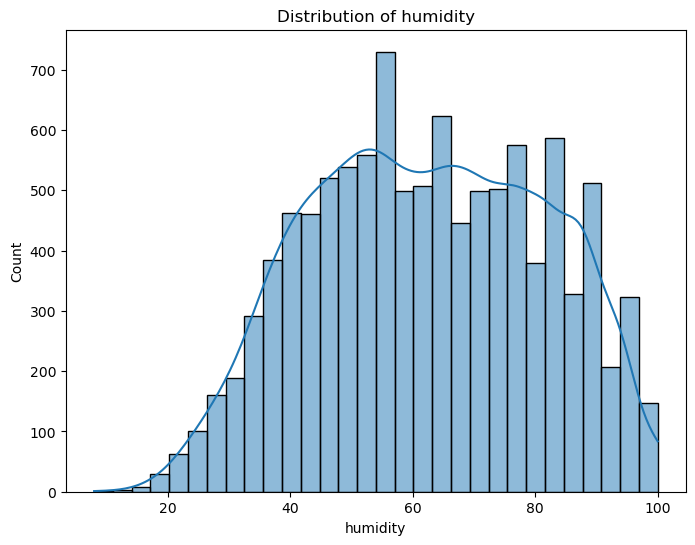

windspeed


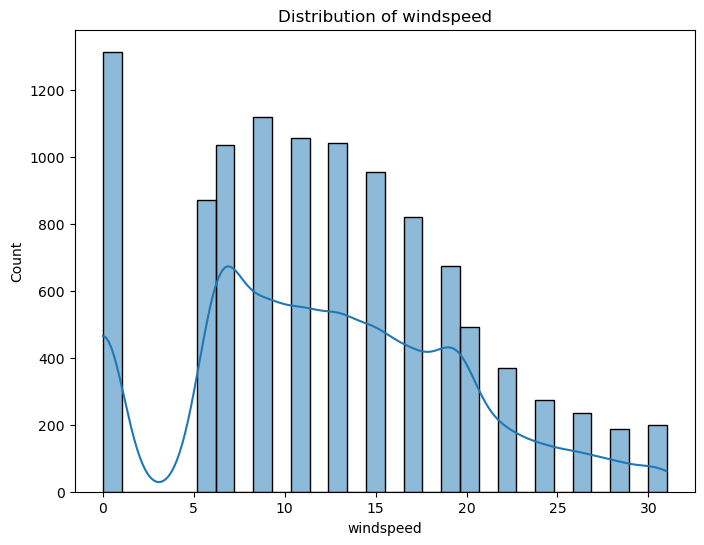

In [33]:
col = ['temp', 'atemp', 'humidity', 'windspeed']
for i in col:
    print(i)
    plt.figure(figsize=(8, 6))
    sns.histplot(data[i], kde=True, bins=30)
    plt.title(f'Distribution of {i}')
    plt.show()

In [34]:
col = ['temp', 'atemp', 'humidity', 'windspeed']

for i in col:
    print(f"{i} Skew =",data[i].skew())

temp Skew = -0.0030689431025826353
atemp Skew = -0.10071445580352667
humidity Skew = -0.04087719610557307
windspeed Skew = 0.2281171827767107


Since the skewness values for all the columns are very close to zero, there is no significant skew in the data. This implies that:

- **No Transformation is Needed**: The data is already well-distributed, and no log, square root, or other transformations are required to address skewness.
- **Ready for Modeling**: The dataset can be used directly for machine learning or statistical analysis without additional preprocessing to address skewness.


### The pre-processing phase is complete, as we have effectively handled null values, duplicate entries, and outliers. The dataset is now clean and ready for further analysis.


### Next, we will conduct Exploratory Data Analysis (EDA) to gain deeper insights and a better understanding of our dataset.


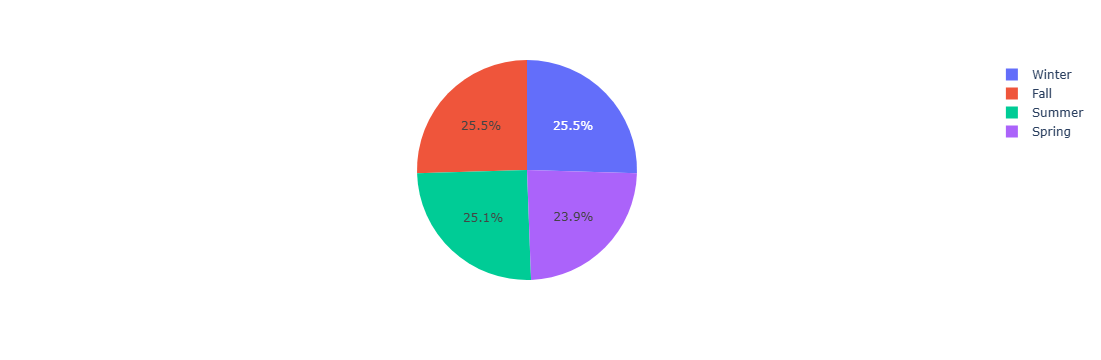

In [38]:
fig = px.pie(data_frame = data['season'].value_counts().reset_index(), names='season', values='count')
fig.show()

### Our dataset is evenly distributed across the different seasons.

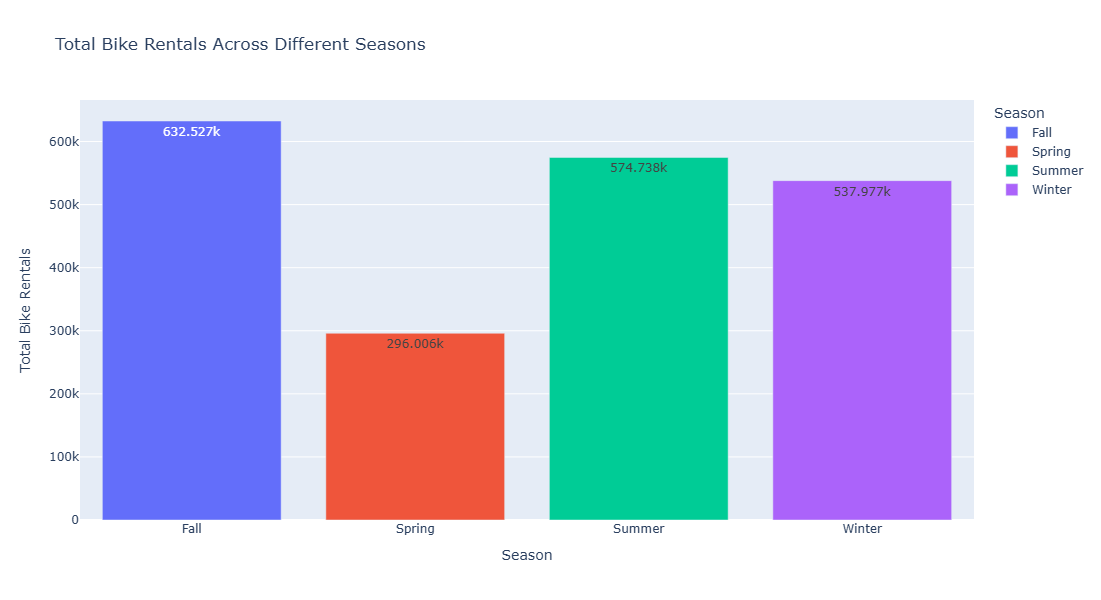

In [40]:
fig = px.bar(
    data_frame=data.groupby(['season'])['count'].sum().reset_index(),
    x='season',
    y='count',
    labels={'season': 'Season', 'count': 'Total Bike Rentals'},
    title='Total Bike Rentals Across Different Seasons',
    color='season',  
    color_continuous_scale='Viridis', text_auto=True
)

fig.update_layout(
    height=600,  
    width=1050    
)

fig.show()

### The majority of bike rentals occurred during the Fall season, with a total of 632,527 rentals, making it the peak season for bike usage. This is followed by the Summer season, which saw 574,738 rentals. Winter comes next with 537,977 rentals, while the Spring season had the least number of rentals at 296,006.

### This suggests that bike rentals are most popular during the fall, with summer also experiencing high demand, while spring sees significantly fewer rentals.

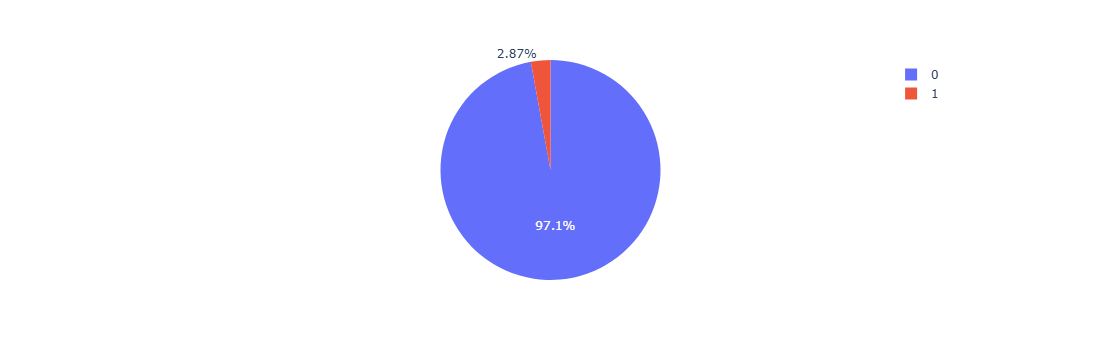

In [42]:
fig = px.pie(data_frame = data['holiday'].value_counts().reset_index(), names='holiday', values='count')
fig.show()

### As expected, the dataset reflects that holidays are much less frequent compared to working days, with 10,333 data points for non-holidays and only 305 for holidays.

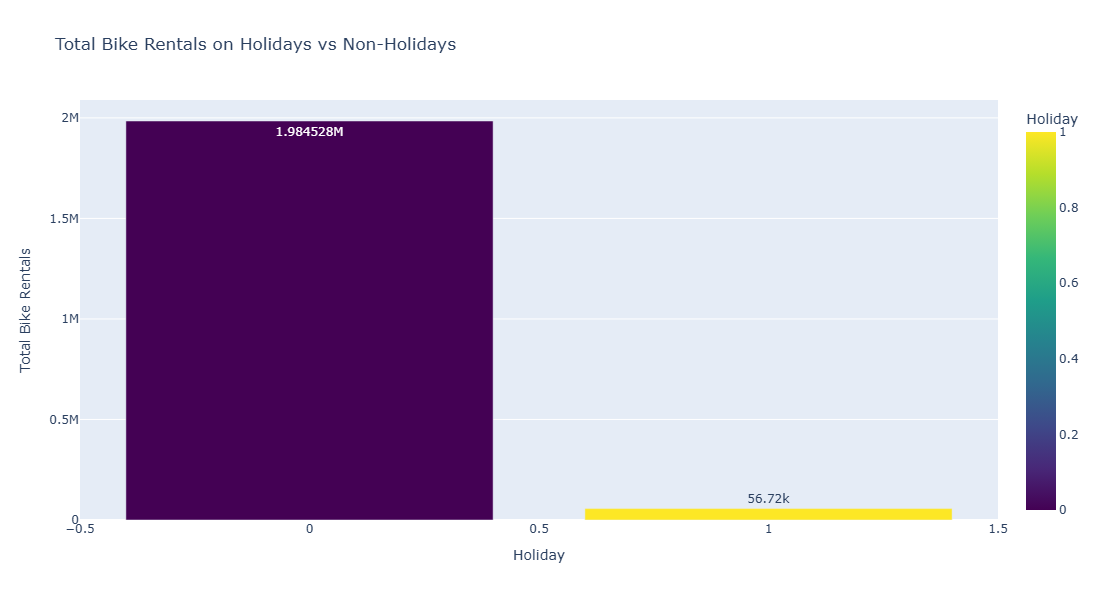

In [44]:
fig = px.bar(
    data_frame=data.groupby(['holiday'])['count'].sum().reset_index(),
    x='holiday',
    y='count',
    labels={'holiday': 'Holiday', 'count': 'Total Bike Rentals'},
    title='Total Bike Rentals on Holidays vs Non-Holidays',
    color='holiday',  
    color_continuous_scale='Viridis', text_auto=True
)

fig.update_layout(
    height=600,  
    width=1050    
)

fig.show()

### The majority of bike rentals occurred on non-holiday days, with a total of 1,984,528 rentals, making it the dominant category for bike usage. In contrast, holiday days saw significantly fewer rentals, with only 56,720 rentals.

### This indicates that bike rentals are far more popular on non-holidays, while holidays experience much lower demand.

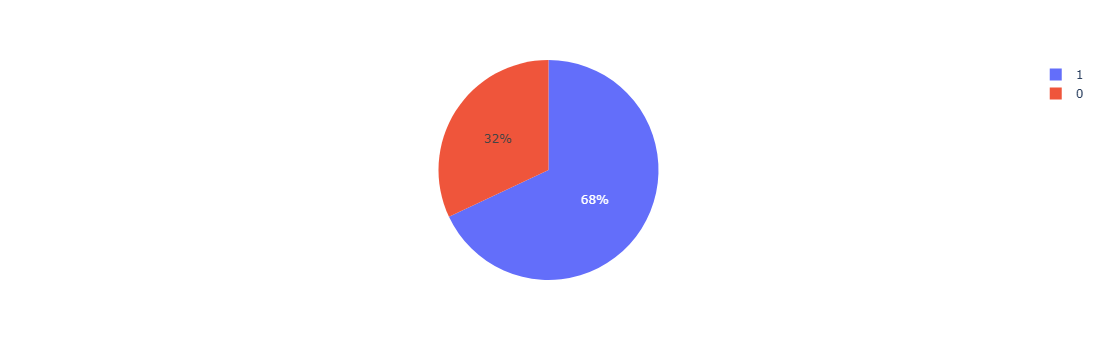

In [46]:
fig = px.pie(data_frame = data['workingday'].value_counts().reset_index(), names='workingday', values='count')
fig.show()

### As expected, the dataset shows that working days are more prevalent, with 7,234 data points for working days and 3,404 for non-working days.

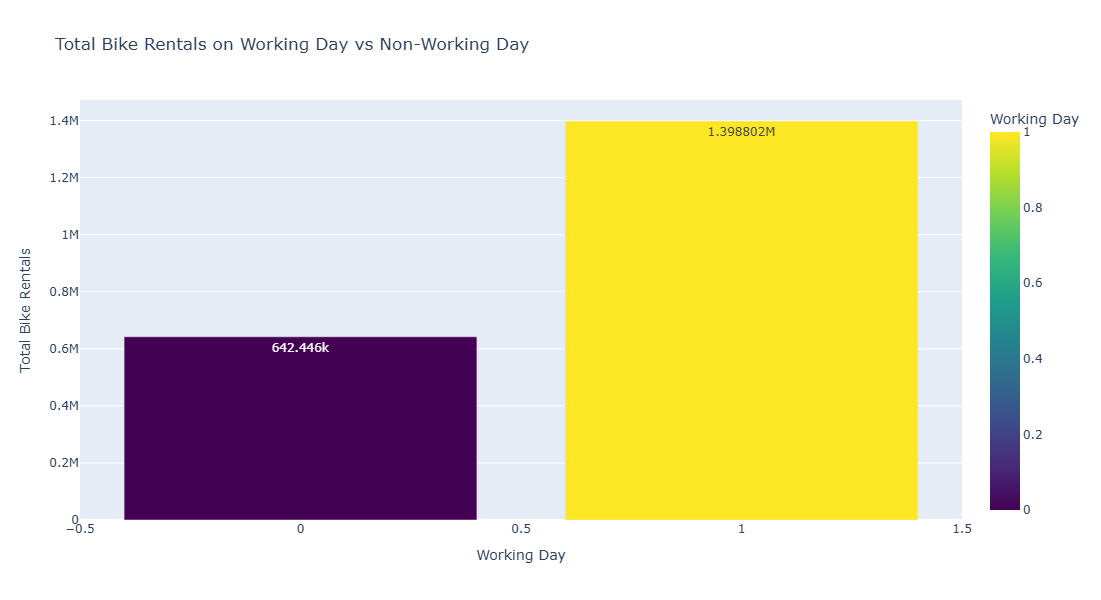

In [48]:
fig = px.bar(
    data_frame=data.groupby(['workingday'])['count'].sum().reset_index(),
    x='workingday',
    y='count',
    labels={'workingday': 'Working Day', 'count': 'Total Bike Rentals'},
    title='Total Bike Rentals on Working Day vs Non-Working Day',
    color='workingday',  
    color_continuous_scale='Viridis', text_auto=True
)

fig.update_layout(
    height=600,  
    width=1050    
)

fig.show()

### The majority of bike rentals occurred on working days, with a total of 1,398,802 rentals, making it the dominant category for bike usage. In contrast, non-working days (weekends and holidays) saw significantly fewer rentals, with only 642,446 rentals.

### This suggests that bike rentals are much more popular on working days, with a substantial drop in demand on non-working days.

In [50]:
total_rentals = data['count'].sum()

percentage_workingday_0_holiday_0 = (597064 / total_rentals) * 100
percentage_workingday_0_holiday_1 = (57808 / total_rentals) * 100
percentage_workingday_1_holiday_0 = (1430604 / total_rentals) * 100

print(f"Percentage of rentals (workingday=0, holiday=0): {percentage_workingday_0_holiday_0:.2f}%")
print(f"Percentage of rentals (workingday=0, holiday=1): {percentage_workingday_0_holiday_1:.2f}%")
print(f"Percentage of rentals (workingday=1, holiday=0): {percentage_workingday_1_holiday_0:.2f}%")


Percentage of rentals (workingday=0, holiday=0): 29.25%
Percentage of rentals (workingday=0, holiday=1): 2.83%
Percentage of rentals (workingday=1, holiday=0): 70.08%


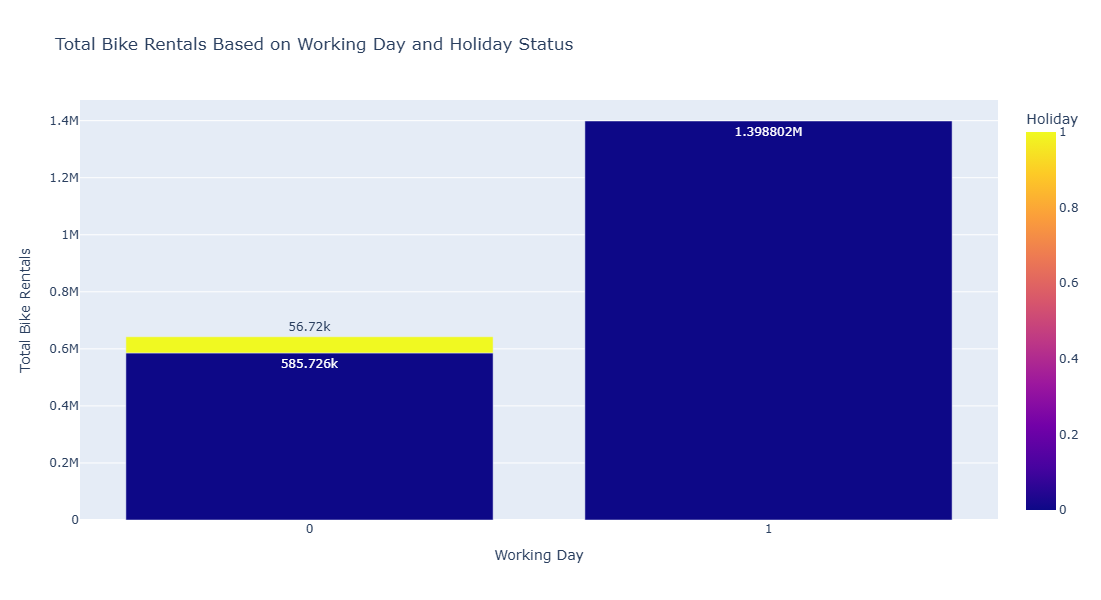

In [51]:
fig = px.bar(
    data_frame=  data.groupby(['workingday', 'holiday'])['count'].sum().reset_index(),
    x='workingday', 
    y='count',
    color='holiday',  
    barmode='group', 
    labels={'workingday': 'Working Day', 'count': 'Total Bike Rentals', 'holiday': 'Holiday'},
    title='Total Bike Rentals Based on Working Day and Holiday Status',
    text_auto=True
)

# Show the plot
fig.update_layout(
    height=600,
    width=1050
)

fig.show()

In [52]:
data.groupby(['workingday', 'holiday'])['count'].sum().reset_index()

workingday  holiday    count
0           0        0   585726
1           0        1    56720
2           1        0  1398802

The dataset reveals the distribution of bike rentals based on the combination of working day and holiday status:

- When it is **neither a working day nor a holiday** (workingday = 0, holiday = 0), there are **585,726** bike rentals, which makes up **29.25%** of the total rentals.
- On **non-working holidays** (workingday = 0, holiday = 1), bike rentals drop significantly to **56,720**, accounting for **2.83%** of the total rentals.
- On **working days that are not holidays** (workingday = 1, holiday = 0), bike rentals peak at **1,398,802**, contributing to **70.08%** of the total rentals.

### Key Insights:
- **Non-working days** (weekends or holidays) have fewer bike rentals, with **non-working holidays** being the least popular for bike rentals.
- **Working days** see the highest number of rentals, particularly when there are no holidays, indicating that bike usage is most common during regular workdays.

This pattern suggests that bike rentals are most popular during regular working days and drop significantly during holidays and non-working days.


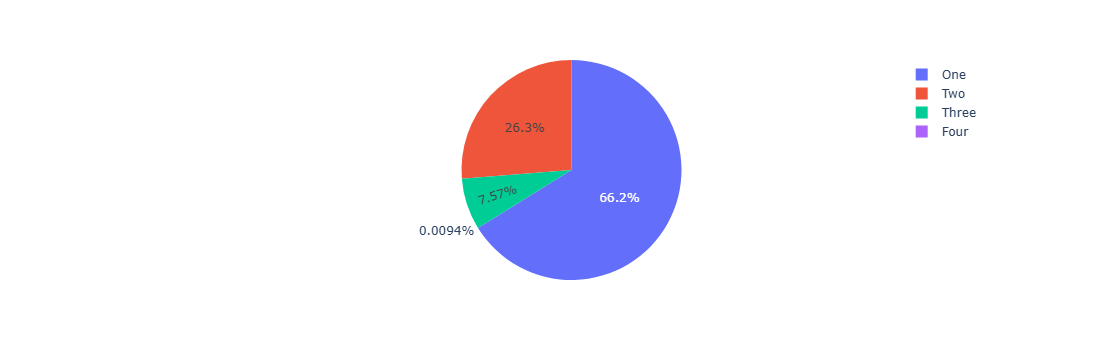

In [54]:
fig = px.pie(data_frame = data['weather'].value_counts().reset_index(), names='weather', values='count')
fig.show()

- **Weather condition 1** (Clear, Few clouds, Partly cloudy, Partly cloudy) is the most frequent, with 7,039 data points.
- **Weather condition 2** (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) follows with 2,793 data points.
- **Weather condition 3** (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) has 805 data points.
- **Weather condition 4** (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) is the least frequent, with only 1 data point.

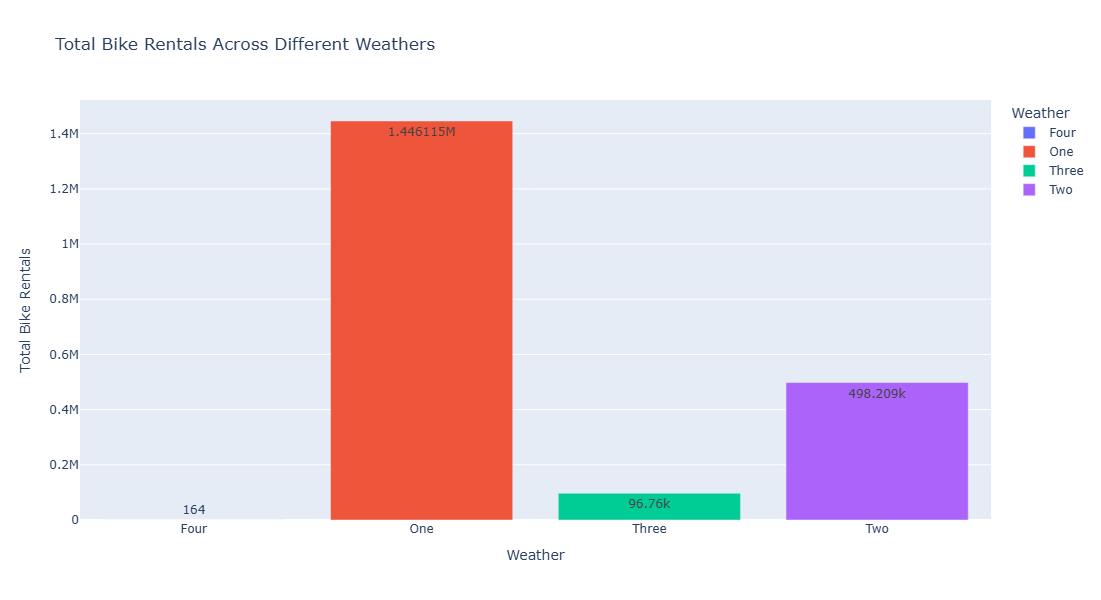

In [56]:
fig = px.bar(
    data_frame=data.groupby(['weather'])['count'].sum().reset_index(),
    x='weather',
    y='count',
    labels={'weather': 'Weather', 'count': 'Total Bike Rentals'},
    title='Total Bike Rentals Across Different Weathers',
    color='weather',  
    color_continuous_scale='Viridis', text_auto=True
)

fig.update_layout(
    height=600,  
    width=1050    
)

fig.show()

The dataset reveals the distribution of bike rentals based on weather conditions:

- **Weather condition 1** (Clear, Few clouds, Partly cloudy) is the most frequent, with **1,446,115** bike rentals.
- **Weather condition 2** (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds) follows with **498,209** bike rentals.
- **Weather condition 3** (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) has **96,760** bike rentals.
- **Weather condition 4** (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) is the least frequent, with only **164** rentals.

### Key Insights:
- **Clear or partly cloudy weather** (Weather condition 1) is by far the most common condition for bike rentals.
- **Mist and cloudy conditions** (Weather condition 2) are also frequent, with a substantial number of rentals.
- **Harsh weather conditions** (Weather conditions 3 and 4), including snow, rain, and fog, see significantly fewer bike rentals.

This pattern suggests that bike rentals are most popular in **clear or partly cloudy weather**, with a significant drop in rentals as weather conditions worsen.


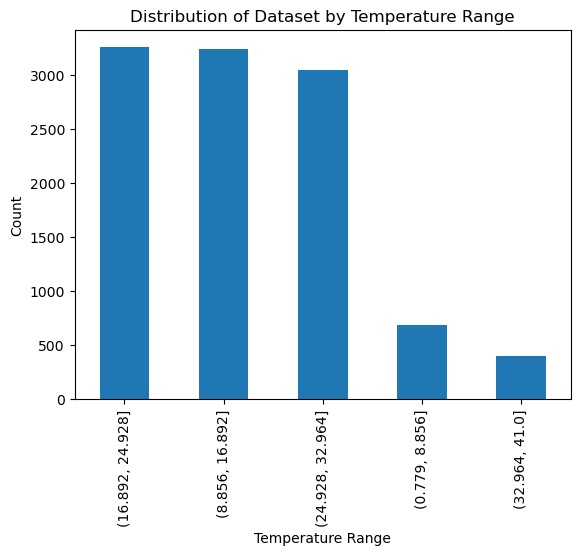

In [58]:
data['temp'].value_counts(bins=5).plot(kind='bar')

plt.xlabel('Temperature Range')
plt.ylabel('Count')
plt.title('Distribution of Dataset by Temperature Range')
plt.show()

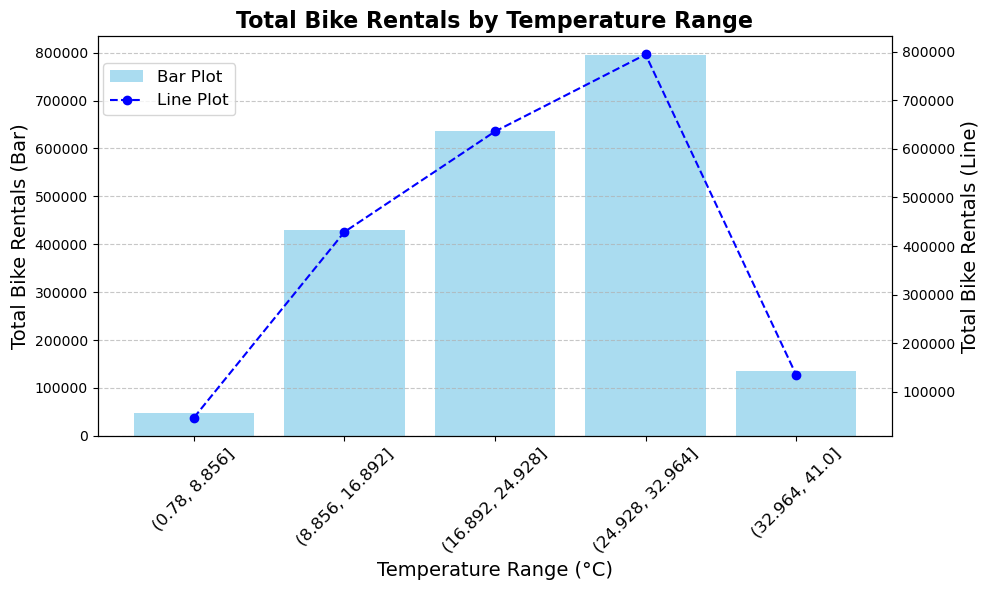

In [59]:
temp_bins = pd.cut(data['temp'], bins=5)
rental_by_temp_bin = data.groupby(temp_bins)['count'].sum()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(rental_by_temp_bin.index.astype(str), rental_by_temp_bin, color='skyblue', alpha=0.7, label='Bar Plot')
ax1.set_ylabel('Total Bike Rentals (Bar)', fontsize=14)
ax1.set_xlabel('Temperature Range (°C)', fontsize=14)
ax1.set_xticklabels(rental_by_temp_bin.index.astype(str), rotation=45, fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2 = ax1.twinx()
ax2.plot(rental_by_temp_bin.index.astype(str), rental_by_temp_bin, color='blue', marker='o', linestyle='--', label='Line Plot')
ax2.set_ylabel('Total Bike Rentals (Line)', fontsize=14)

plt.title('Total Bike Rentals by Temperature Range', fontsize=16, fontweight='bold')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=12)

plt.tight_layout()
plt.show()

The dataset reveals the distribution of bike rentals based on temperature ranges:

- **0.78°C to 8.856°C**: 48K bike rentals, representing a small portion of total rentals.
- **8.856°C to 16.892°C**: 438K bike rentals, indicating increased usage in cooler but comfortable conditions.
- **16.892°C to 24.928°C**: 650K bike rentals, showing strong demand in moderate temperatures.
- **24.928°C to 32.964°C**: 810K bike rentals, the peak rental period in warm temperatures.
- **32.964°C to 41.0°C**: 136K bike rentals, showing a significant drop in extremely hot conditions.

### Key Insights:
- **Warm temperatures** (24.928°C to 32.964°C) drive the highest rental rates.
- **Moderate temperatures** also show high demand, while **cooler and hotter temperatures** see fewer rentals.

This suggests that bike rentals are most popular in moderate to warm weather and drop during both cold and extreme heat.

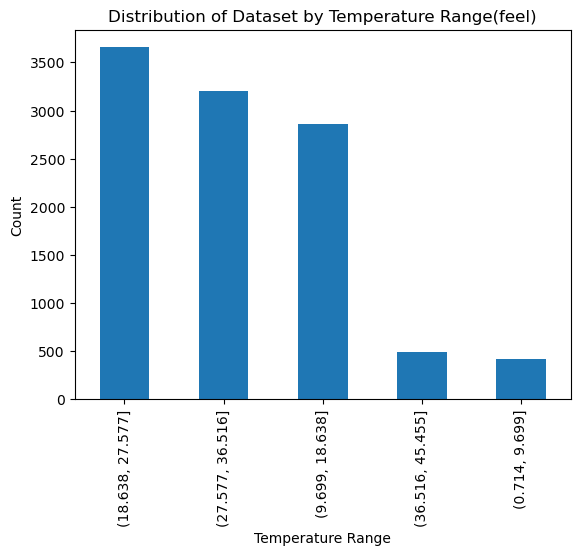

In [61]:
data['atemp'].value_counts(bins=5).plot(kind='bar')

plt.xlabel('Temperature Range')
plt.ylabel('Count')
plt.title('Distribution of Dataset by Temperature Range(feel)')
plt.show()

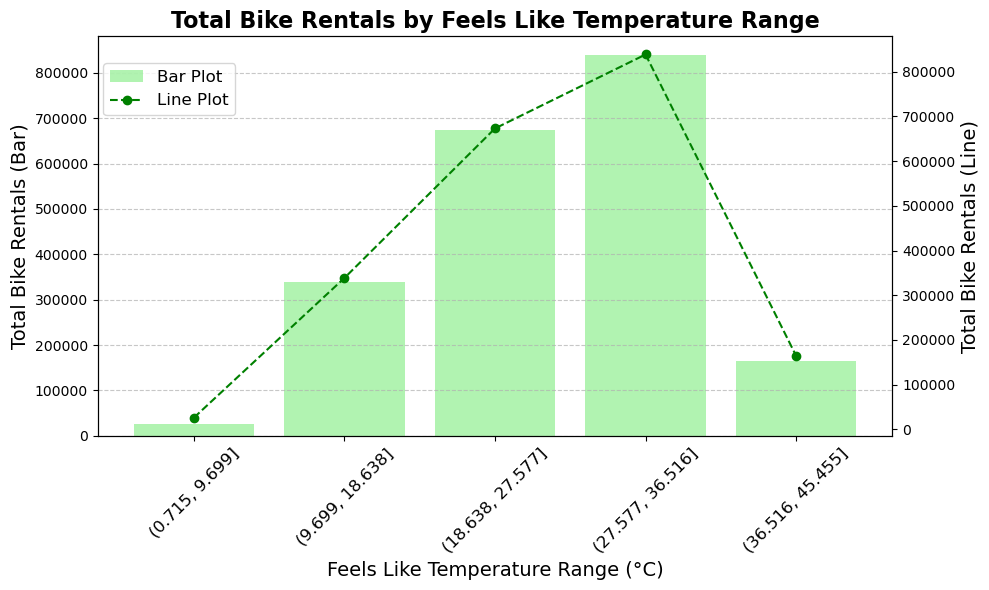

In [62]:
atemp_bins = pd.cut(data['atemp'], bins=5)
rental_by_atemp_bin = data.groupby(atemp_bins)['count'].sum()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(rental_by_atemp_bin.index.astype(str), rental_by_atemp_bin, color='lightgreen', alpha=0.7, label='Bar Plot')
ax1.set_ylabel('Total Bike Rentals (Bar)', fontsize=14)
ax1.set_xlabel('Feels Like Temperature Range (°C)', fontsize=14)
ax1.set_xticklabels(rental_by_atemp_bin.index.astype(str), rotation=45, fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2 = ax1.twinx()
ax2.plot(rental_by_atemp_bin.index.astype(str), rental_by_atemp_bin, color='green', marker='o', linestyle='--', label='Line Plot')
ax2.set_ylabel('Total Bike Rentals (Line)', fontsize=14)

plt.title('Total Bike Rentals by Feels Like Temperature Range', fontsize=16, fontweight='bold')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=12)

plt.tight_layout()
plt.show()

The dataset reveals the distribution of bike rentals based on **"Feels like" temperature (atemp)**:

- **(0.715°C, 9.699°C]**: 28K bike rentals, representing a smaller portion of total rentals.
- **(9.699°C, 18.638°C]**: 345K bike rentals, indicating a moderate number of rentals in cooler conditions.
- **(18.638°C, 27.577°C]**: 689K bike rentals, showing a strong demand in comfortable and moderate "feels like" temperatures.
- **(27.577°C, 36.516°C]**: 854K bike rentals, marking the peak of bike rentals in warmer temperatures.
- **(36.516°C, 45.455°C]**: 167K bike rentals, showing a sharp decline in extremely hot conditions.

### Key Insights:
- **Warmer "feels like" temperatures** (27.577°C to 36.516°C) lead to the highest number of bike rentals.
- **Moderate "feels like" temperatures** also show high demand, while both **cooler and hotter temperatures** see fewer rentals.

This suggests that **bike rentals are most popular when the "feels like" temperature is warm to moderately hot**, and they drop during colder or extremely hot conditions.
conditions.


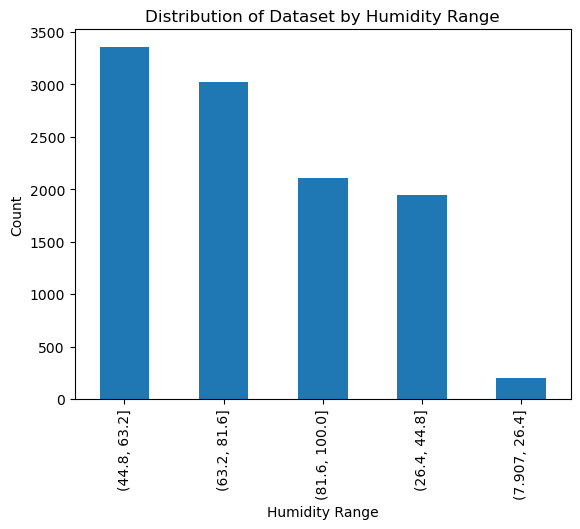

In [64]:
data['humidity'].value_counts(bins=5).plot(kind='bar')

plt.xlabel('Humidity Range')
plt.ylabel('Count')
plt.title('Distribution of Dataset by Humidity Range')
plt.show()

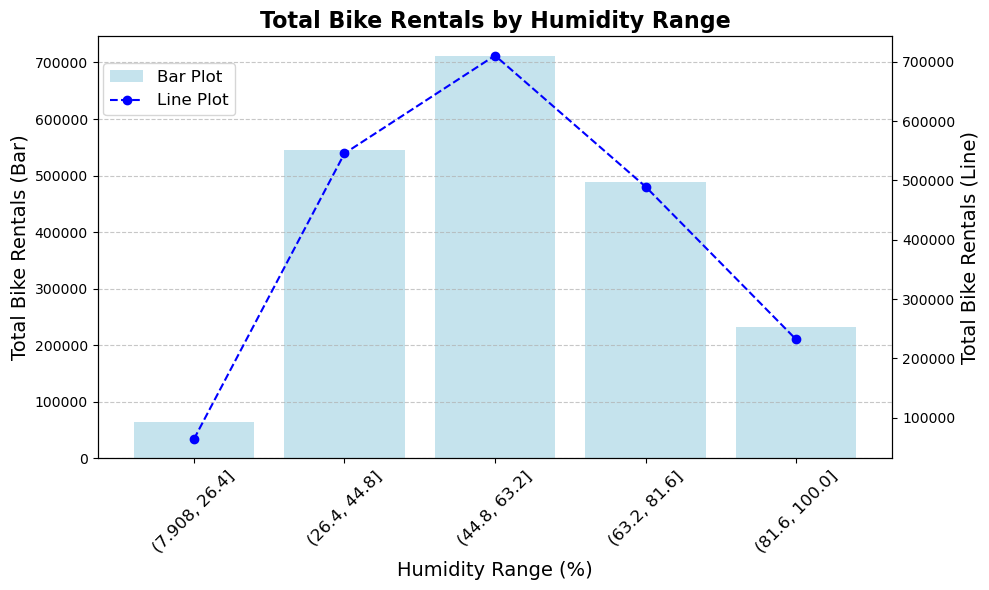

In [65]:
humidity_bins = pd.cut(data['humidity'], bins=5)
rental_by_hum_bin = data.groupby(humidity_bins)['count'].sum()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(rental_by_hum_bin.index.astype(str), rental_by_hum_bin, color='lightblue', alpha=0.7, label='Bar Plot')
ax1.set_ylabel('Total Bike Rentals (Bar)', fontsize=14)
ax1.set_xlabel('Humidity Range (%)', fontsize=14)
ax1.set_xticklabels(rental_by_hum_bin.index.astype(str), rotation=45, fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2 = ax1.twinx()
ax2.plot(rental_by_hum_bin.index.astype(str), rental_by_hum_bin, color='blue', marker='o', linestyle='--', label='Line Plot')
ax2.set_ylabel('Total Bike Rentals (Line)', fontsize=14)

plt.title('Total Bike Rentals by Humidity Range', fontsize=16, fontweight='bold')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=12)

plt.tight_layout()
plt.show()

The dataset reveals the distribution of bike rentals based on **humidity** levels:

- **(-0.1%, 20.0%]**: 14K bike rentals, representing a very small portion of total rentals.
- **(20.0%, 40.0%]**: 453K bike rentals, indicating a moderate demand in low humidity conditions.
- **(40.0%, 60.0%]**: 786K bike rentals, showing strong demand in moderate humidity levels.
- **(60.0%, 80.0%]**: 579K bike rentals, maintaining good rental numbers in higher humidity.
- **(80.0%, 100.0%]**: 252K bike rentals, showing a decline in extremely high humidity conditions.

### Key Insights:
- **Moderate humidity** (40.0% to 60.0%) sees the highest number of bike rentals.
- **Low and high humidity** (both ends of the spectrum) show fewer rentals, with **extremely high humidity** (80.0% to 100.0%) seeing the sharpest decline in rentals.

This suggests that **bike rentals are most popular in moderate humidity conditions** and decline in both very low and very high humidity.


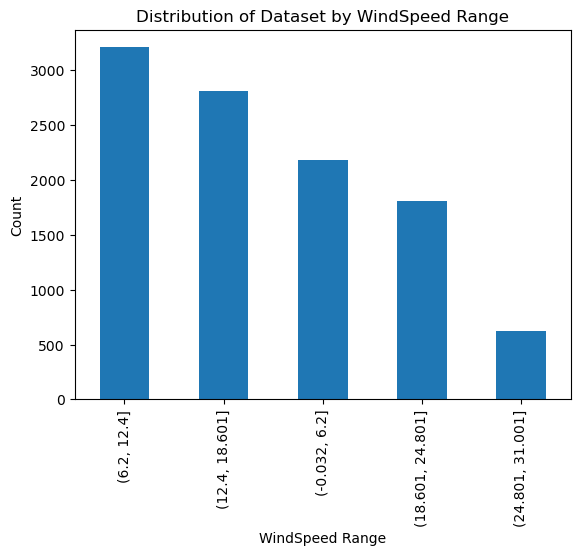

In [67]:
data['windspeed'].value_counts(bins=5).plot(kind='bar')

plt.xlabel('WindSpeed Range')
plt.ylabel('Count')
plt.title('Distribution of Dataset by WindSpeed Range')
plt.show()

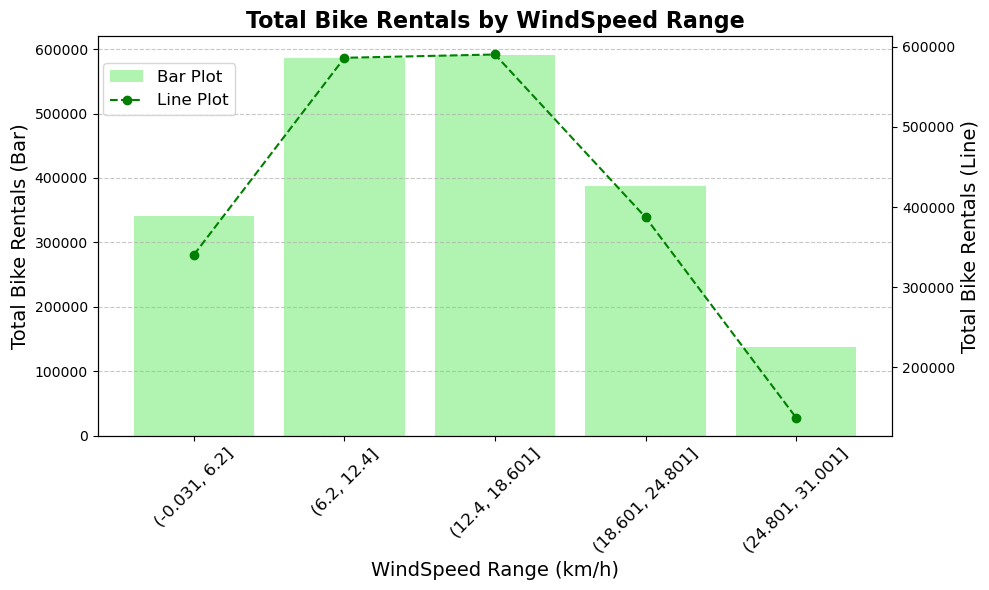

In [68]:
windspeed_bins = pd.cut(data['windspeed'], bins=5)
rental_by_ws_bin = data.groupby(windspeed_bins)['count'].sum()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(rental_by_ws_bin.index.astype(str), rental_by_ws_bin, color='lightgreen', alpha=0.7, label='Bar Plot')
ax1.set_ylabel('Total Bike Rentals (Bar)', fontsize=14)
ax1.set_xlabel('WindSpeed Range (km/h)', fontsize=14)
ax1.set_xticklabels(rental_by_ws_bin.index.astype(str), rotation=45, fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2 = ax1.twinx()
ax2.plot(rental_by_ws_bin.index.astype(str), rental_by_ws_bin, color='green', marker='o', linestyle='--', label='Line Plot')
ax2.set_ylabel('Total Bike Rentals (Line)', fontsize=14)

plt.title('Total Bike Rentals by WindSpeed Range', fontsize=16, fontweight='bold')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=12)

plt.tight_layout()
plt.show()

The dataset reveals the distribution of bike rentals based on **windspeed**:

- **(-0.057, 11.399]**: 926K bike rentals, representing the highest demand in low wind conditions.
- **(11.399, 22.799]**: 917K bike rentals, showing strong demand in moderate wind conditions.
- **(22.799, 34.198]**: 212K bike rentals, indicating a significant drop as windspeed increases.
- **(34.198, 45.598]**: 27K bike rentals, showing a sharp decline in bike rentals as windspeed rises further.
- **(45.598, 56.997]**: 1K bike rentals, representing a very small number of rentals in very high wind conditions.

### Key Insights:
- **Low to moderate wind speeds** (up to 22.799 km/h) see the highest number of bike rentals.
- **High wind speeds** (above 22.799 km/h) see a significant decline in bike rentals, especially as windspeed increases further.

This suggests that **bike rentals are most popular in calm to moderate wind conditions** and drop as windspeed becomes higher.


In [70]:
data.head(2)

datetime  season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00  Spring        0           0     One  9.84  14.395   
1 2011-01-01 01:00:00  Spring        0           0     One  9.02  13.635   

   humidity  windspeed  count  Year  Months  Days  Hour Year-Month  
0        81        0.0     16  2011       1     1     0    2011-01  
1        80        0.0     40  2011       1     1     1    2011-01

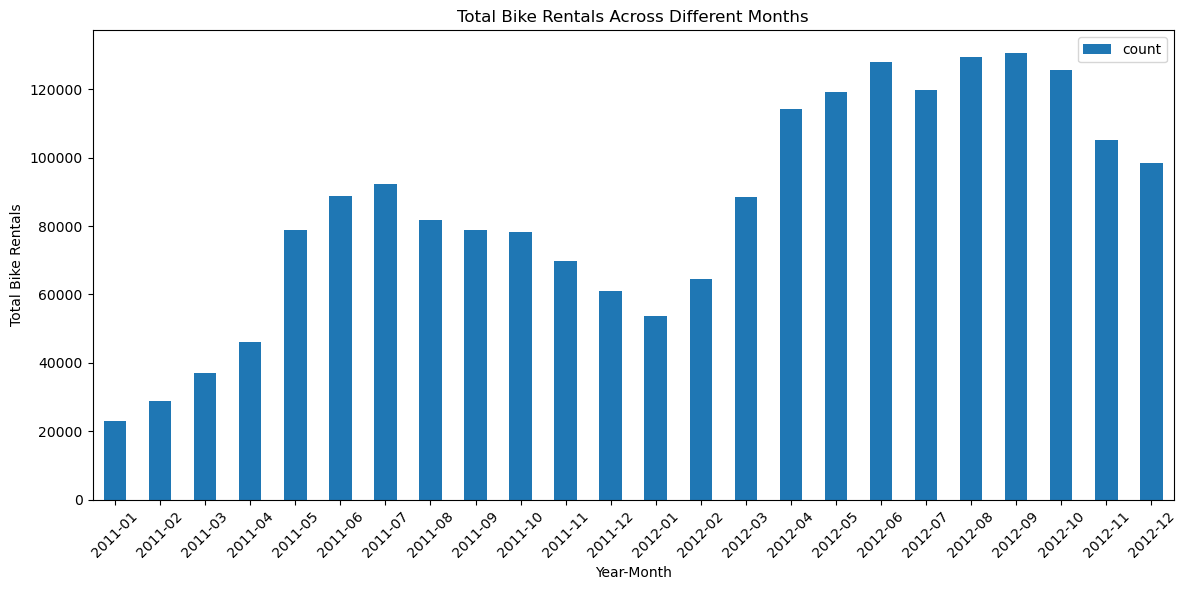

In [71]:
data.groupby(['Year-Month'])['count'].sum().reset_index().plot(kind='bar', x='Year-Month', y='count', figsize=(12, 6))

plt.xlabel('Year-Month')
plt.ylabel('Total Bike Rentals')
plt.title('Total Bike Rentals Across Different Months')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The data reveals a clear seasonal trend in bike rentals:

- **Summer Peaks**: Rentals are highest in the warmer months, particularly from May to September, with the peak in July and August 2012 reaching over 130,000 rentals.
- **Winter Decline**: Bike rentals drop significantly in the winter months (December, January, and February).
- **Year-over-Year Growth**: There is an overall increase in bike rentals from 2011 to 2012, particularly in the summer months, indicating growth in demand.
- **Seasonal Pattern**: Bike rentals are most popular during the warmer months, with a gradual decline in the colder months.

In summary, bike rentals peak in the summer and drop in winter, with a steady increase in rentals over the year.
 year.


In [73]:
bins = [-1, 2, 5, 8, 11, 14, 17, 20, 23]  
labels = [
    '12 AM - 3 AM', 
    '3 AM - 6 AM', 
    '6 AM - 9 AM', 
    '9 AM - 12 PM', 
    '12 PM - 3 PM', 
    '3 PM - 6 PM', 
    '6 PM - 9 PM', 
    '9 PM - 12 AM'
]  
data['Hour_Range'] = pd.cut(data['Hour'], bins=bins, labels=labels)


In [74]:
hourly_data = data.groupby(['Year-Month', 'Hour_Range'])['count'].sum().reset_index()

pivot_table = hourly_data.pivot_table(
    index='Year-Month',
    columns='Hour_Range',
    values='count',
    fill_value=0  
)

pivot_table

Hour_Range  12 AM - 3 AM  3 AM - 6 AM  6 AM - 9 AM  9 AM - 12 PM  \
Year-Month                                                         
2011-01            571.0        153.0       3430.0        3232.0   
2011-02            689.0        200.0       4656.0        4191.0   
2011-03            747.0        221.0       5435.0        5483.0   
2011-04           1074.0        366.0       6488.0        6374.0   
2011-05           2108.0        676.0      10687.0        9633.0   
2011-06           2396.0        750.0      12589.0       11150.0   
2011-07           2999.0        811.0      11690.0       11548.0   
2011-08           1911.0        724.0      12601.0        9951.0   
2011-09           2335.0        762.0       9943.0       10699.0   
2011-10           2049.0        677.0       9744.0       10772.0   
2011-11           1507.0        580.0      11069.0        9205.0   
2011-12           1786.0        567.0       9610.0        8739.0   
2012-01           1358.0        473.0       8702.0        7236.0   
2012-02           1441.0        415.0      11180.0        9132.0   
2012-03           1821.0        666.0      13074.0       12183.0   
2012-04           1953.0        733.0      16188.0       15229.0   
2012-05           2779.0        811.0      16155.0       15700.0   
2012-06           3096.0       1010.0      17443.0       16524.0   
2012-07           3454.0       1034.0      17251.0       15852.0   
2012-08           3409.0       1062.0      16935.0       17026.0   
2012-09           3168.0       1229.0      17931.0       16922.0   
2012-10           2724.0        986.0      19689.0       16485.0   
2012-11           2832.0        906.0      15609.0       15002.0   
2012-12           2404.0        905.0      15725.0       13287.0   

Hour_Range  12 PM - 3 PM  3 PM - 6 PM  6 PM - 9 PM  9 PM - 12 AM  
Year-Month                                                        
2011-01           3946.0       5479.0       4603.0        1714.0  
2011-02           4859.0       6290.0       5549.0        2511.0  
2011-03           6335.0       8906.0       7262.0        2739.0  
2011-04           8263.0       9844.0       9860.0        3974.0  
2011-05          12100.0      18458.0      18171.0        6971.0  
2011-06          13936.0      18905.0      20011.0        9003.0  
2011-07          15204.0      19078.0      20571.0       10232.0  
2011-08          12399.0      17476.0      18940.0        7844.0  
2011-09          13350.0      18239.0      16473.0        6995.0  
2011-10          13432.0      18759.0      16065.0        6656.0  
2011-11          11375.0      16445.0      13870.0        5664.0  
2011-12          10214.0      13056.0      11945.0        5044.0  
2012-01           8774.0      11822.0      11097.0        4250.0  
2012-02          10289.0      14096.0      12608.0        5344.0  
2012-03          16184.0      19463.0      18040.0        7157.0  
2012-04          18871.0      26576.0      25708.0        8804.0  
2012-05          19843.0      27804.0      25237.0       10707.0  
2012-06          21382.0      27596.0      28696.0       12106.0  
2012-07          18293.0      23893.0      27358.0       12681.0  
2012-08          19662.0      28735.0      30014.0       12436.0  
2012-09          21473.0      29883.0      29105.0       10946.0  
2012-10          19829.0      29959.0      25621.0       10292.0  
2012-11          18648.0      24549.0      19549.0        7954.0  
2012-12          16997.0      22491.0      19161.0        7543.0

### Observations and Insights

1. **Morning Peak (6 AM - 9 AM):**
   - This range consistently shows high bike rental counts, especially on working days.
   - Rentals increase significantly during spring and summer months, indicating a higher demand during commute hours.

2. **Evening Peak (3 PM - 6 PM, 6 PM - 9 PM):**
   - The highest rentals occur during these hours, suggesting strong demand for evening commutes or leisure activities after work.
   - Summer months like June to September see the most pronounced peaks in these ranges.

3. **Nighttime Hours (9 PM - 12 AM, 12 AM - 3 AM):**
   - Rentals are lowest during these hours, indicating minimal activity.
   - Slight increases can be observed in warmer months, likely due to late-night leisure activities.

4. **Early Morning (3 AM - 6 AM):**
   - Consistently low rental counts during these hours across all months, reflecting low demand at these times.

5. **Seasonal Trends:**
   - Rentals are significantly higher in summer months (May to September) across all time ranges, with peaks in the morning and evening commute hours.
   - Winter months (December, January, February) show lower rentals overall, aligning with colder weather and reduced outdoor activity.

6. **Year-over-Year Growth:**
   - Comparing 2011 and 2012, there is a noticeable increase in rentals across all hour ranges, reflecting growth in bike usage.
   - This increase is particularly evident during the peak commute hours and in summer months.

### Key Insights:
- **Commuting Hours Dominate**: Morning (6 AM - 9 AM) and evening (3 PM - 9 PM) hours consistently show the highest rentals, driven by work commutes.
- **Seasonal Preference**: Warmer months see higher demand, with a significant drop during winter.
- **Nighttime and Early Morning Usage**: These hours exhibit minimal activity, suggesting bikes are primarily used for commuting and daytime leisure activities.
- **Growth Trend**: A year-over-year increase indicates rising popularity and adoption of bike rentals.


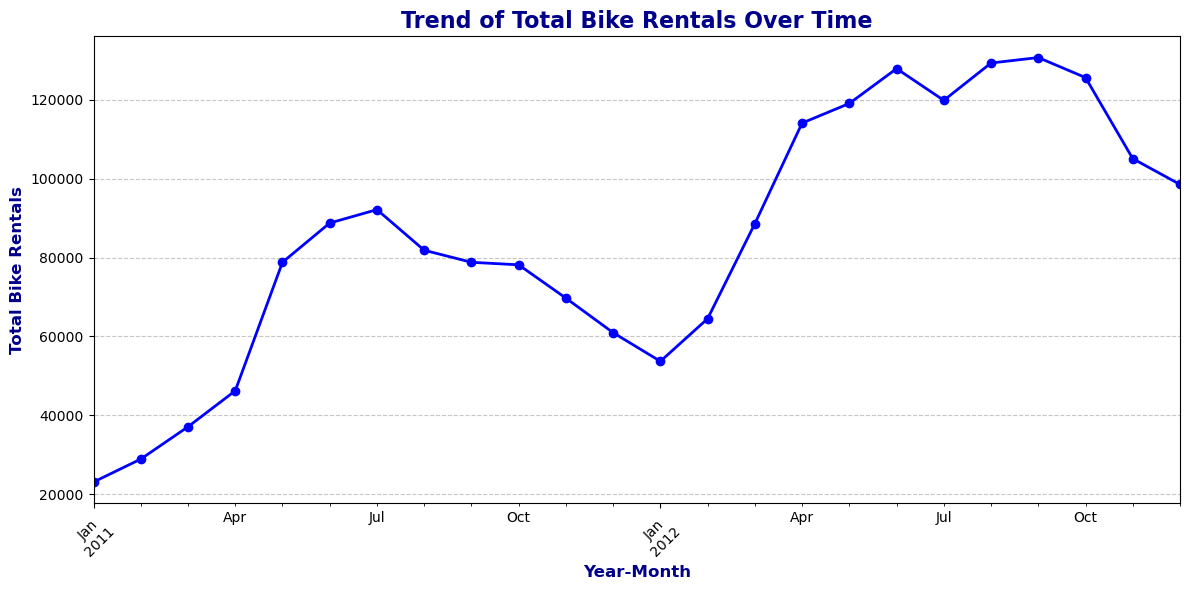

In [76]:
plt.figure(figsize=(12, 6))
data.groupby(['Year-Month'])['count'].sum().plot(kind='line', marker='o', color='blue', linewidth=2)

plt.title('Trend of Total Bike Rentals Over Time', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Year-Month', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Total Bike Rentals', fontsize=12, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

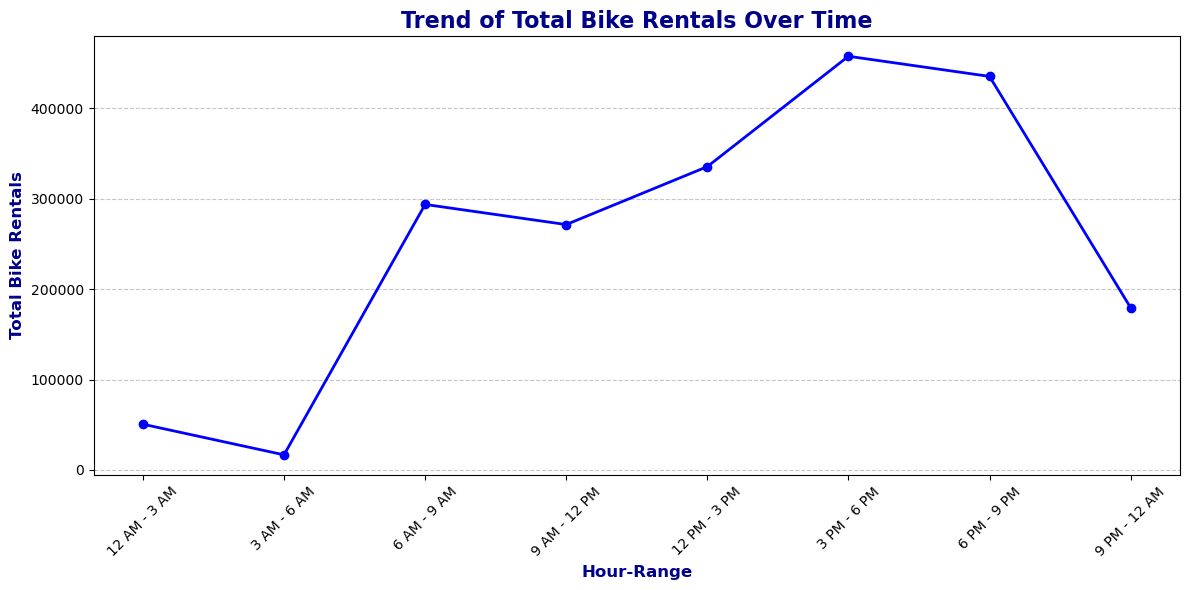

In [77]:
plt.figure(figsize=(12, 6))
data.groupby(['Hour_Range'])['count'].sum().plot(kind='line', marker='o', color='blue', linewidth=2)

plt.title('Trend of Total Bike Rentals Over Time', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Hour-Range', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Total Bike Rentals', fontsize=12, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# **Bike Rental Dataset Analysis and Insights**

## **1. Seasonal Trends**
- **Observation**:
  - Fall has the highest rentals, followed by Summer and Winter. Spring has the least rentals.
  - Rentals peak during warmer months and drop in colder ones.
- **Insight**:
  - Fall offers ideal weather for biking, driving the highest demand.
  - Spring's low rentals might be influenced by transitional weather or rain.
  - Seasonal campaigns can focus on promoting biking in Spring or Winter.

---

## **2. Holiday vs. Non-Holiday**
- **Observation**:
  - Rentals are significantly higher on non-holidays compared to holidays.
- **Insight**:
  - Bikes are primarily used for commuting rather than leisure on holidays.
  - Holidays might benefit from targeted marketing for leisure biking, such as promoting scenic routes or group rides.

---

## **3. Working Days vs. Non-Working Days**
- **Observation**:
  - Rentals peak on working days and drop on non-working days.
- **Insight**:
  - Bikes are primarily used for commuting.
  - Non-working days offer opportunities for promoting biking as a leisure or fitness activity.

---

## **4. Weather Conditions**
- **Observation**:
  - Clear or partly cloudy weather sees the highest rentals.
  - Harsh weather conditions, like heavy rain or snow, lead to minimal rentals.
- **Insight**:
  - Clear weather strongly influences biking demand.

---

## **5. Temperature Ranges**
- **Observation**:
  - Warm temperatures (24.928°C to 32.964°C) see the highest rentals.
  - Rentals drop during colder and extremely hot conditions.
- **Insight**:
  - Moderate to warm temperatures are ideal for biking.

---

## **6. Humidity**
- **Observation**:
  - Moderate humidity (40%-60%) sees the highest rentals.
  - Extreme humidity (both low and high) reduces rentals.
- **Insight**:
  - Comfort is a key factor in bike usage.
  - Weather-friendly gear or services can maintain usage in extreme humidity.

---

## **7. Windspeed**
- **Observation**:
  - Rentals are highest at low to moderate wind speeds (<22.799 km/h).
  - Rentals drop significantly as windspeed increases.
- **Insight**:
  - High winds deter biking.

---

## **8. Hourly Trends**
- **Observation**:
  - Morning (6 AM - 9 AM) and evening (3 PM - 9 PM) peaks suggest commuter usage.
  - Night and early morning hours see minimal activity.
- **Insight**:
  - Bikes are predominantly used for commuting.
  - Enhancements like lighting and safety measures can promote nighttime usage.

---

## **9. Year-over-Year Growth**
- **Observation**:
  - Rentals increased significantly from 2011 to 2012.
- **Insight**:
  - Growing popularity suggests opportunities to expand services and infrastructure.

---

## **Recommendations**
1. **Seasonal Marketing**:
   - Promote biking in Fall and Summer, and address barriers in Spring and Winter.
2. **Engage on Non-Working Days**:
   - Organize events, promote leisure biking, and create scenic maps for weekends and holidays.
3. **Weather-Responsive Strategies**:
   - Offer weather protection gear during adverse conditions.
4. **Enhance Commuter Features**:
   - Improve availability and safety during peak hours (morning and evening).
5. **Support Growth**:
   - Expand bike infrastructure and services to sustain rising demand.

---


### Having completed the Exploratory Data Analysis (EDA) phase, we are now ready to move forward with implementing the Machine Learning model.


In [80]:
data.head()

datetime  season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00  Spring        0           0     One  9.84  14.395   
1 2011-01-01 01:00:00  Spring        0           0     One  9.02  13.635   
2 2011-01-01 02:00:00  Spring        0           0     One  9.02  13.635   
3 2011-01-01 03:00:00  Spring        0           0     One  9.84  14.395   
4 2011-01-01 04:00:00  Spring        0           0     One  9.84  14.395   

   humidity  windspeed  count  Year  Months  Days  Hour Year-Month  \
0        81        0.0     16  2011       1     1     0    2011-01   
1        80        0.0     40  2011       1     1     1    2011-01   
2        80        0.0     32  2011       1     1     2    2011-01   
3        75        0.0     13  2011       1     1     3    2011-01   
4        75        0.0      1  2011       1     1     4    2011-01   

     Hour_Range  
0  12 AM - 3 AM  
1  12 AM - 3 AM  
2  12 AM - 3 AM  
3   3 AM - 6 AM  
4   3 AM - 6 AM

In [81]:
df_train = data.copy()
df_train.head()

datetime  season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00  Spring        0           0     One  9.84  14.395   
1 2011-01-01 01:00:00  Spring        0           0     One  9.02  13.635   
2 2011-01-01 02:00:00  Spring        0           0     One  9.02  13.635   
3 2011-01-01 03:00:00  Spring        0           0     One  9.84  14.395   
4 2011-01-01 04:00:00  Spring        0           0     One  9.84  14.395   

   humidity  windspeed  count  Year  Months  Days  Hour Year-Month  \
0        81        0.0     16  2011       1     1     0    2011-01   
1        80        0.0     40  2011       1     1     1    2011-01   
2        80        0.0     32  2011       1     1     2    2011-01   
3        75        0.0     13  2011       1     1     3    2011-01   
4        75        0.0      1  2011       1     1     4    2011-01   

     Hour_Range  
0  12 AM - 3 AM  
1  12 AM - 3 AM  
2  12 AM - 3 AM  
3   3 AM - 6 AM  
4   3 AM - 6 AM

### See here 

In [83]:
df_train.drop(['datetime', 'Year-Month', 'Hour', 'Months', 'Days', 'weather', 'windspeed'], axis=1, inplace=True)

In [84]:
df_train.head(2)

season  holiday  workingday  temp   atemp  humidity  count  Year  \
0  Spring        0           0  9.84  14.395        81     16  2011   
1  Spring        0           0  9.02  13.635        80     40  2011   

     Hour_Range  
0  12 AM - 3 AM  
1  12 AM - 3 AM

In [85]:
df_train = pd.get_dummies(df_train, drop_first=True, dtype='int')
df_train.head(2)

holiday  workingday  temp   atemp  humidity  count  Year  season_Spring  \
0        0           0  9.84  14.395        81     16  2011              1   
1        0           0  9.02  13.635        80     40  2011              1   

   season_Summer  season_Winter  Hour_Range_3 AM - 6 AM  \
0              0              0                       0   
1              0              0                       0   

   Hour_Range_6 AM - 9 AM  Hour_Range_9 AM - 12 PM  Hour_Range_12 PM - 3 PM  \
0                       0                        0                        0   
1                       0                        0                        0   

   Hour_Range_3 PM - 6 PM  Hour_Range_6 PM - 9 PM  Hour_Range_9 PM - 12 AM  
0                       0                       0                        0  
1                       0                       0                        0

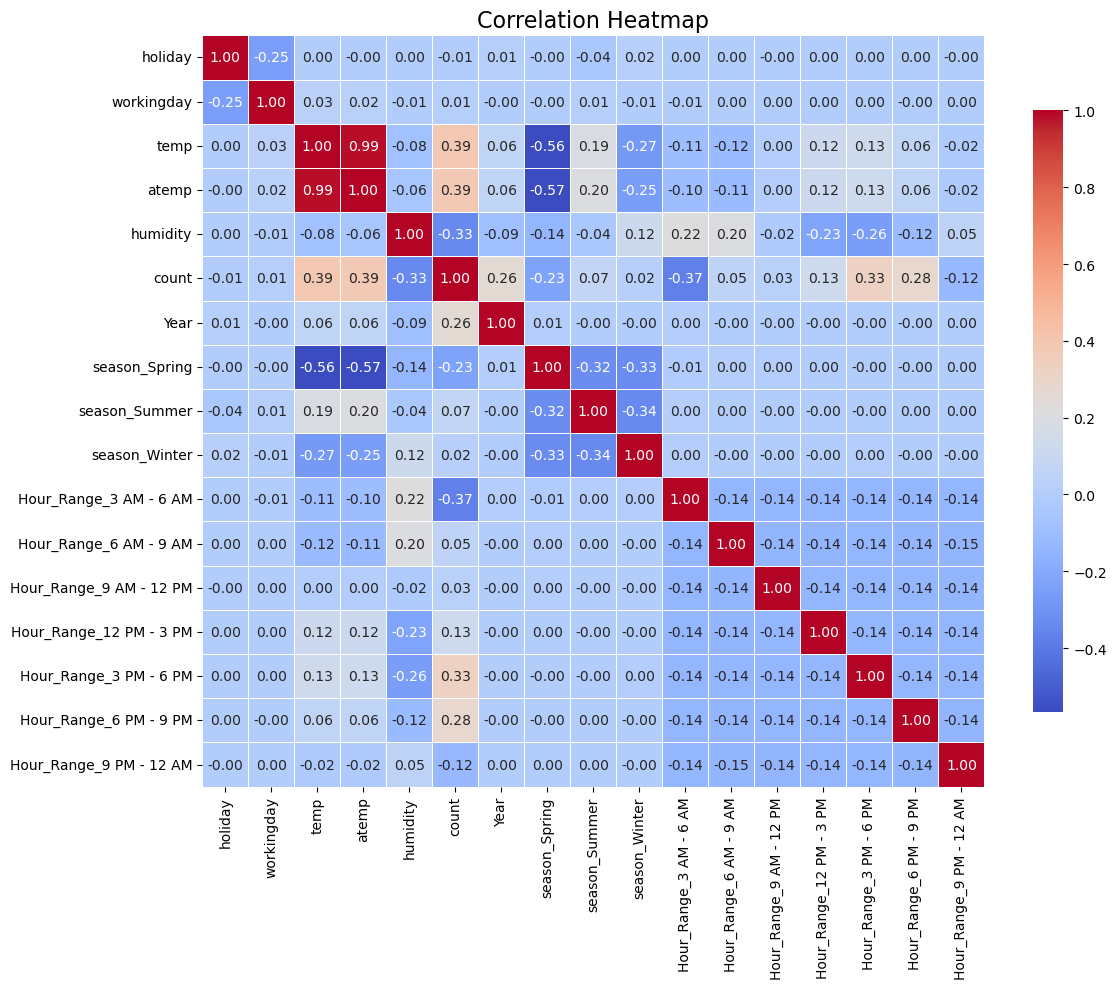

In [86]:
plt.figure(figsize=(12, 10))

sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8}, annot_kws={'size': 10})

plt.title('Correlation Heatmap', fontsize=16)


plt.tight_layout()
plt.show()

### 1. Impact of Weather and Seasonality on Rentals:
- **weather_One (Clear, Few clouds, Partly cloudy):** There is a small positive correlation (0.10) with count, suggesting that clearer weather conditions slightly increase bike rentals.
- **weather_Three (Light Snow, Light Rain + Thunderstorm + Scattered clouds):** Negative correlation (-0.11) with count, meaning that worse weather conditions (like snow and rain) tend to reduce rentals.
- **weather_Two (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist):** This also has a negative correlation (-0.04) with count, although the impact is minimal. Still, misty and cloudy conditions might discourage rentals.
- **season_Spring:** A negative correlation (-0.23) with count, indicating that bike rentals are generally lower in Spring.
- **season_Summer:** Slightly positive correlation (0.07) with count, suggesting that more rentals happen during summer compared to other seasons.
- **season_Winter:** Very weak positive correlation (0.02) with count, suggesting that winter conditions don't drastically reduce rentals in this dataset.

### 2. Effect of Temperature and Humidity:
- **temp (Temperature in Celsius):** Strong positive correlation (0.39) with count, indicating that as the temperature increases, the number of rentals increases. This aligns with the intuition that warmer weather encourages bike rentals.
- **atemp (Feels like temperature in Celsius):** Strong positive correlation (0.39) with count, which suggests that the perceived temperature (how it feels outside) also has a similar influence on rentals. Since temp and atemp are highly correlated (0.99), you may choose one of them to avoid redundancy in modeling.
- **humidity:** Negative correlation (-0.33) with count, suggesting that as humidity increases, the number of rentals tends to decrease. High humidity might make outdoor activities less attractive.

### 3. Other Environmental Factors:
- **windspeed:** Weak positive correlation (0.11) with count, indicating that wind speed has a small but positive effect on bike rentals.

### 4. Time Features:
- **Year:** Weak positive correlation (0.26) with count, suggesting that bike rentals may have slightly increased over the years.
- **Months:** Moderate positive correlation (0.16) with count, with higher bike rentals observed during certain months of the year (especially warmer months). However, it's not a very strong correlation.
- **Days:** Very weak positive correlation (0.02) with count, suggesting that the day of the month doesn’t have a significant impact on rentals.
- **Hour:** Rental activity varies by the time of day, with peaks during the day (9 AM to 6 PM) and slower activity during early morning or late evening hours. For example, Hour_Range_9 AM - 12 PM and Hour_Range_12 PM - 3 PM have positive correlations with rental counts.

### 5. Correlation Among Features:
- **temp and atemp:** As expected, temp and atemp have an extremely high positive correlation (0.99), which makes sense since both represent temperature but in slightly different ways (actual vs. perceived). Retaining both could introduce multicollinearity, so it’s recommended to choose one.
- **season_Spring vs season_Winter:** Moderate negative correlation (-0.33), which implies that bike rentals are lower during Spring and Winter seasons.
- **weather_Two and weather_One:** weather_Two has a strong negative correlation with weather_One (-0.83), indicating these two weather conditions are mutually exclusive, so you would expect either "clear" weather or "misty" conditions, but not both.

### 6. Key Insights and Recommendations:
- **Temperature and Perceived Temperature (temp and atemp)** are the strongest drivers for bike rentals. Warmer weather leads to higher rentals.
- **Weather plays a significant role:** clear weather (weather_One) increases rentals, while conditions like snow, rain, and mist reduce rentals.
- **Humidity negatively impacts bike rentals**, so high humidity days are less favorable for outdoor activities like cycling.
- **Seasons:** Rentals are lower in Spring, but there isn't a major drop in Winter. Summer may lead to a slight increase in rentals.
- **Time of Day:** Rentals tend to increase as the day progresses (reflected in Hour), which is important for time-series forecasting models.
- **Workingday and Holiday variables** seem to have a minimal effect on bike rentals, suggesting that the weather and seasonal conditions have a more significant influence.

### Suggestions:
- **Feature Engineering:** You may want to create new features like weekend or part-of-day (morning, afternoon, evening) from the Hour variable to capture more granular patterns.
- **Modeling Considerations:** Focus on temp, atemp, weather, humidity, and season features, as they have the most meaningful correlations with bike rental counts.


In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_train[['temp', 'atemp', 'humidity', 'Year']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

VIF  Features
0  265.952801      temp
1  303.263608     atemp
2   12.098940  humidity
3   21.160397      Year

In [89]:
df_train.drop(['atemp'], axis = 1, inplace=True)

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_train[['temp', 'humidity', 'Year']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

VIF  Features
0   7.817783      temp
1  11.947972  humidity
2  20.086656      Year

### After removing "atemp," the VIF values have become more manageable. In the first iteration, we will train the model with "Year" included. In the second iteration, we will train the model without "Year" to assess how its removal impacts performance, as "Year" still has a high VIF.

In [92]:
df_train.head(2)

holiday  workingday  temp  humidity  count  Year  season_Spring  \
0        0           0  9.84        81     16  2011              1   
1        0           0  9.02        80     40  2011              1   

   season_Summer  season_Winter  Hour_Range_3 AM - 6 AM  \
0              0              0                       0   
1              0              0                       0   

   Hour_Range_6 AM - 9 AM  Hour_Range_9 AM - 12 PM  Hour_Range_12 PM - 3 PM  \
0                       0                        0                        0   
1                       0                        0                        0   

   Hour_Range_3 PM - 6 PM  Hour_Range_6 PM - 9 PM  Hour_Range_9 PM - 12 AM  
0                       0                       0                        0  
1                       0                       0                        0

In [93]:
X = df_train.loc[:, df_train.columns!='count']
Y =df_train.loc[:,['count']]

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [96]:
X_train.head(2)

holiday  workingday   temp  humidity  Year  season_Spring  \
5098        0           1  18.86       100  2011              0   
9960        0           1  22.14        94  2012              0   

      season_Summer  season_Winter  Hour_Range_3 AM - 6 AM  \
5098              0              1                       0   
9960              0              1                       0   

      Hour_Range_6 AM - 9 AM  Hour_Range_9 AM - 12 PM  \
5098                       0                        0   
9960                       0                        1   

      Hour_Range_12 PM - 3 PM  Hour_Range_3 PM - 6 PM  Hour_Range_6 PM - 9 PM  \
5098                        1                       0                       0   
9960                        0                       0                       0   

      Hour_Range_9 PM - 12 AM  
5098                        0  
9960                        0

In [97]:
Y_train.head(2)

count
5098     55
9960    389

In [98]:
X_test.head()

holiday  workingday   temp  humidity  Year  season_Spring  \
1190        0           1  12.30        56  2011              1   
1790        0           0  19.68        77  2011              0   
4471        0           1  20.50        77  2011              0   
1597        0           1  21.32        77  2011              0   
2705        0           1  33.62        21  2011              0   

      season_Summer  season_Winter  Hour_Range_3 AM - 6 AM  \
1190              0              0                       0   
1790              1              0                       0   
4471              0              1                       0   
1597              1              0                       0   
2705              0              0                       0   

      Hour_Range_6 AM - 9 AM  Hour_Range_9 AM - 12 PM  \
1190                       1                        0   
1790                       0                        0   
4471                       1                        0   
1597                       0                        1   
2705                       0                        0   

      Hour_Range_12 PM - 3 PM  Hour_Range_3 PM - 6 PM  Hour_Range_6 PM - 9 PM  \
1190                        0                       0                       0   
1790                        1                       0                       0   
4471                        0                       0                       0   
1597                        0                       0                       0   
2705                        0                       1                       0   

      Hour_Range_9 PM - 12 AM  
1190                        0  
1790                        0  
4471                        0  
1597                        0  
2705                        0

In [99]:
Y_test.head()

count
1190    241
1790    281
4471    499
1597     49
2705    381

In [100]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

In [101]:
X_train_scale

array([[-0.16993931,  0.69220072, -0.17515797, ..., -0.3784864 ,
        -0.37476699, -0.37825448],
       [-0.16993931,  0.69220072,  0.24495033, ..., -0.3784864 ,
        -0.37476699, -0.37825448],
       [-0.16993931,  0.69220072, -1.33045578, ..., -0.3784864 ,
        -0.37476699, -0.37825448],
       ...,
       [-0.16993931,  0.69220072, -1.22542871, ..., -0.3784864 ,
        -0.37476699,  2.64372283],
       [-0.16993931,  0.69220072, -1.43548286, ..., -0.3784864 ,
        -0.37476699, -0.37825448],
       [-0.16993931,  0.69220072, -0.07013089, ..., -0.3784864 ,
        -0.37476699, -0.37825448]])

In [102]:
X_test_scale

array([[-0.16993931,  0.69220072, -1.01537456, ..., -0.3784864 ,
        -0.37476699, -0.37825448],
       [-0.16993931, -1.44466767, -0.07013089, ..., -0.3784864 ,
        -0.37476699, -0.37825448],
       [-0.16993931,  0.69220072,  0.03489618, ..., -0.3784864 ,
        -0.37476699, -0.37825448],
       ...,
       [-0.16993931,  0.69220072,  0.03489618, ..., -0.3784864 ,
        -0.37476699, -0.37825448],
       [-0.16993931, -1.44466767,  0.03489618, ..., -0.3784864 ,
        -0.37476699,  2.64372283],
       [-0.16993931,  0.69220072,  0.56003156, ..., -0.3784864 ,
        -0.37476699, -0.37825448]])

## Support Vector Regressor

In [104]:
from sklearn.svm import SVR

model = SVR()

model.fit(X_train_scale, Y_train)

SVR()

In [105]:
y_hat = model.predict(X_train_scale)
y_hat

array([128.06087141, 172.57171871, 152.78559545, ...,  81.43954288,
        -2.57234071, 212.14935279])

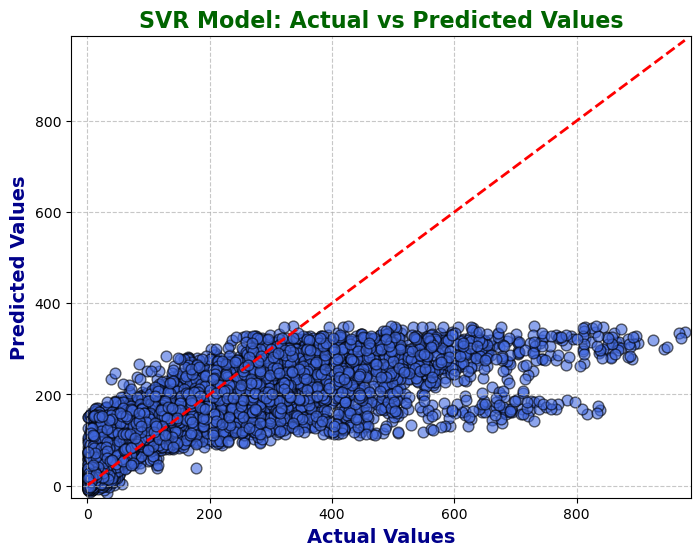

In [106]:
Y_train_values = Y_train.values  

plt.figure(figsize=(8, 6))
plt.scatter(Y_train_values, y_hat, color='royalblue', alpha=0.6, edgecolors='black', s=60)

plt.plot([min(Y_train_values), max(Y_train_values)], [min(Y_train_values), max(Y_train_values)], color='red', linewidth=2, linestyle='--')

plt.xlabel('Actual Values', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Predicted Values', fontsize=14, fontweight='bold', color='darkblue')
plt.title('SVR Model: Actual vs Predicted Values', fontsize=16, fontweight='bold', color='darkgreen')

limit_min = min(min(Y_train_values), min(y_hat)) - 10
limit_max = max(max(Y_train_values), max(y_hat)) + 10

plt.xlim(limit_min, limit_max)
plt.ylim(limit_min, limit_max)

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [107]:
score_df = pd.DataFrame({'Actual Value': np.reshape(Y_train.values, (np.size(Y_train.values)),), 'Predicted Value': y_hat})
score_df['Predicted Value'] = score_df['Predicted Value'].round(0)
score_df['Difference'] = score_df['Actual Value'] - score_df['Predicted Value']
score_df['Diff %'] = np.absolute(score_df['Difference'] * 100 / score_df['Actual Value'])
score_df.head()

Actual Value  Predicted Value  Difference      Diff %
0            55            128.0       -73.0  132.727273
1           389            173.0       216.0   55.526992
2           415            153.0       262.0   63.132530
3           189            226.0       -37.0   19.576720
4           197            207.0       -10.0    5.076142

In [108]:
score_df.describe()

Actual Value  Predicted Value   Difference        Diff %
count   7446.000000      7446.000000  7446.000000   7446.000000
mean     192.337900       152.389202    39.948697    137.633844
std      180.455227        86.076306   126.352136    433.811560
min        1.000000       -17.000000  -201.000000      0.000000
25%       43.000000        92.250000   -34.000000     19.402985
50%      147.000000       153.000000     0.000000     40.909091
75%      286.000000       213.000000    75.000000     76.767052
max      977.000000       350.000000   676.000000  14900.000000

In [109]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_train, y_hat)
print(f'SVR train - Mean Squared Error (MSE): {mse}')

r2 = r2_score(Y_train, y_hat)
print(f'SVR train R-squared: {r2}')

SVR train - Mean Squared Error (MSE): 17560.126550189358
SVR train R-squared: 0.4606793620968962


In [110]:
y_pred = model.predict(X_test_scale)
y_pred

array([100.792375  , 178.68683487, 134.36151477, ...,  70.30047651,
       129.72124039, 190.42562702])

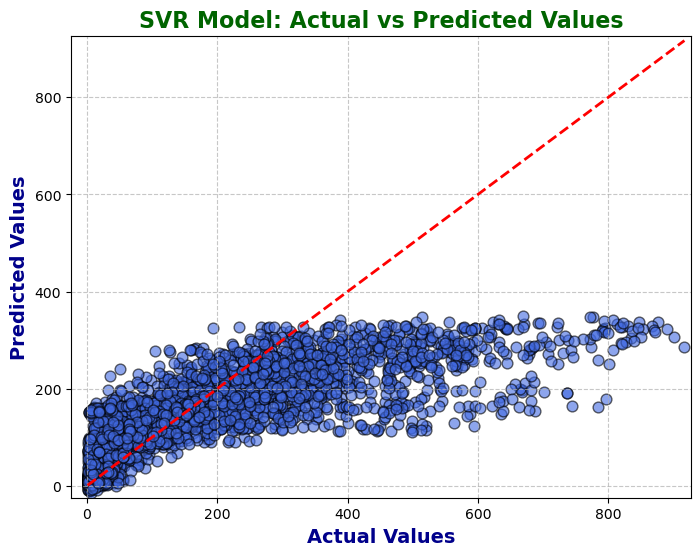

In [111]:
Y_test_values = Y_test.values  

plt.figure(figsize=(8, 6))
plt.scatter(Y_test_values, y_pred, color='royalblue', alpha=0.6, edgecolors='black', s=60)

plt.plot([min(Y_test_values), max(Y_test_values)], [min(Y_test_values), max(Y_test_values)], color='red', linewidth=2, linestyle='--')

plt.xlabel('Actual Values', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Predicted Values', fontsize=14, fontweight='bold', color='darkblue')
plt.title('SVR Model: Actual vs Predicted Values', fontsize=16, fontweight='bold', color='darkgreen')

limit_min = min(min(Y_test_values), min(y_pred)) - 10
limit_max = max(max(Y_test_values), max(y_pred)) + 10

plt.xlim(limit_min, limit_max)
plt.ylim(limit_min, limit_max)

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


In [112]:
score_df = pd.DataFrame({'Actual Value': np.reshape(Y_test.values, (np.size(Y_test.values),)), 'Predicted Value': y_pred})
score_df['Predicted Value'] = score_df['Predicted Value'].round(0)
score_df['Difference'] = score_df['Actual Value'] - score_df['Predicted Value']
score_df['Diff %'] = np.absolute(score_df['Difference'] * 100 / score_df['Actual Value'])
score_df.head()

Actual Value  Predicted Value  Difference      Diff %
0           241            101.0       140.0   58.091286
1           281            179.0       102.0   36.298932
2           499            134.0       365.0   73.146293
3            49            137.0       -88.0  179.591837
4           381            283.0        98.0   25.721785

In [113]:
score_df.describe()

Actual Value  Predicted Value   Difference       Diff %
count   3192.000000      3192.000000  3192.000000  3192.000000
mean     190.820802       151.862155    38.958647   145.794931
std      183.077485        86.537778   128.176753   429.473917
min        1.000000       -15.000000  -190.000000     0.000000
25%       42.000000        93.000000   -36.000000    18.951019
50%      142.000000       151.000000    -1.000000    42.857143
75%      281.000000       213.000000    71.000000    83.192884
max      917.000000       350.000000   632.000000  9200.000000

In [114]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, y_pred)
print(f'SVR test - Mean Squared Error (MSE): {mse}')

r2 = r2_score(Y_test, y_pred)
print(f'SVR test R-squared: {r2}')

SVR test - Mean Squared Error (MSE): 17943.585754567637
SVR test R-squared: 0.4644803181582413


## Linear Regression Model

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
linear_model = LinearRegression()
linear_model.fit(X_train_scale, Y_train)

LinearRegression()

In [118]:
y_hat = linear_model.predict(X_train_scale)
y_hat

array([[ 161.8654264 ],
       [ 250.57176964],
       [ 255.71875935],
       ...,
       [  88.05861052],
       [-116.39176396],
       [ 275.23167726]])

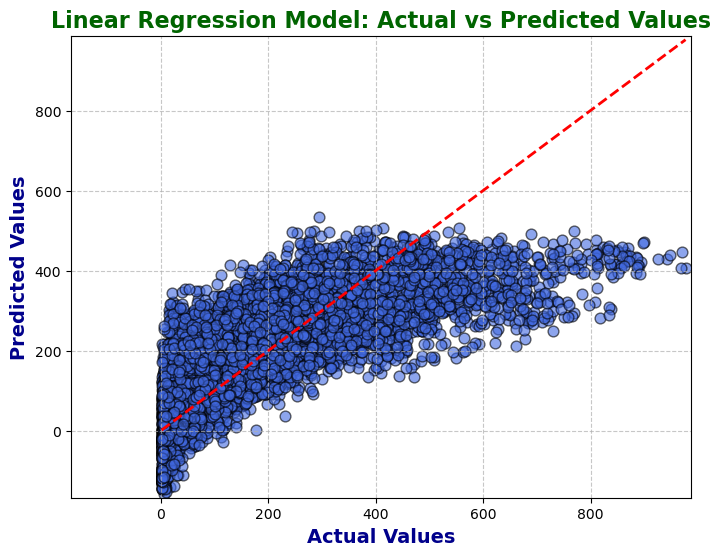

In [119]:
Y_train_values = Y_train.values  

plt.figure(figsize=(8, 6))
plt.scatter(Y_train_values, y_hat, color='royalblue', alpha=0.6, edgecolors='black', s=60)

plt.plot([min(Y_train_values), max(Y_train_values)], [min(Y_train_values), max(Y_train_values)], color='red', linewidth=2, linestyle='--')

plt.xlabel('Actual Values', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Predicted Values', fontsize=14, fontweight='bold', color='darkblue')
plt.title('Linear Regression Model: Actual vs Predicted Values', fontsize=16, fontweight='bold', color='darkgreen')

limit_min = min(min(Y_train_values), min(y_hat)) - 10
limit_max = max(max(Y_train_values), max(y_hat)) + 10

plt.xlim(limit_min, limit_max)
plt.ylim(limit_min, limit_max)

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [120]:
score_df = pd.DataFrame({'Actual Value': np.reshape(Y_train.values, (np.size(Y_train.values)),), 'Predicted Value': np.reshape(y_hat, (np.size(y_hat)),)})
score_df['Predicted Value'] = score_df['Predicted Value'].round(0)
score_df['Difference'] = score_df['Actual Value'] - score_df['Predicted Value']
score_df['Diff %'] = np.absolute(score_df['Difference'] * 100 / score_df['Actual Value'])
score_df.head()

Actual Value  Predicted Value  Difference      Diff %
0            55            162.0      -107.0  194.545455
1           389            251.0       138.0   35.475578
2           415            256.0       159.0   38.313253
3           189            304.0      -115.0   60.846561
4           197            294.0       -97.0   49.238579

In [121]:
score_df.describe()

Actual Value  Predicted Value   Difference        Diff %
count   7446.000000      7446.000000  7446.000000   7446.000000
mean     192.337900       192.340586    -0.002686    298.218855
std      180.455227       136.336318   118.214545   1048.129651
min        1.000000      -158.000000  -323.000000      0.000000
25%       43.000000        90.000000   -76.000000     22.409335
50%      147.000000       199.000000   -14.000000     47.716136
75%      286.000000       295.000000    54.000000    136.538462
max      977.000000       534.000000   572.000000  14800.000000

In [122]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_train, y_hat)
print(f'Linear Regression train - Mean Squared Error (MSE): {mse}')

r2 = r2_score(Y_train, y_hat)
print(f'Linear Regression train - R-squared: {r2}')

Linear Regression train - Mean Squared Error (MSE): 13972.005729783772
Linear Regression train - R-squared: 0.5708805957955043


In [123]:
y_pred = linear_model.predict(X_test_scale)

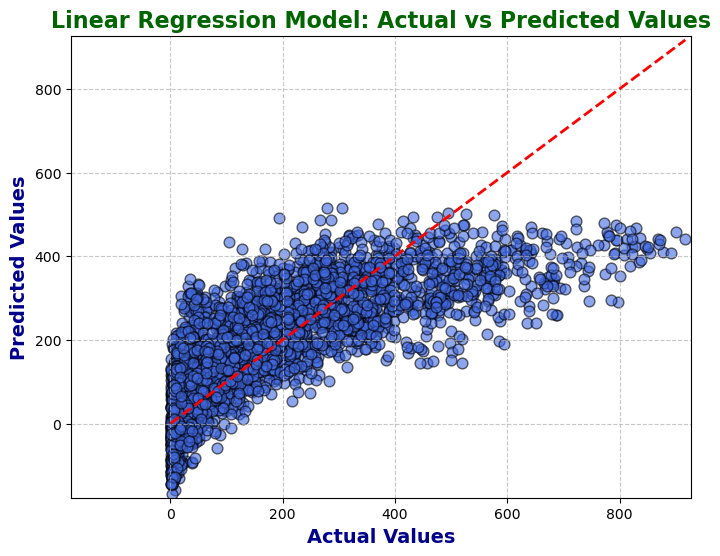

In [124]:
Y_test_values = Y_test.values  

plt.figure(figsize=(8, 6))
plt.scatter(Y_test_values, y_pred, color='royalblue', alpha=0.6, edgecolors='black', s=60)

plt.plot([min(Y_test_values), max(Y_test_values)], [min(Y_test_values), max(Y_test_values)], color='red', linewidth=2, linestyle='--')

plt.xlabel('Actual Values', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Predicted Values', fontsize=14, fontweight='bold', color='darkblue')
plt.title('Linear Regression Model: Actual vs Predicted Values', fontsize=16, fontweight='bold', color='darkgreen')

limit_min = min(min(Y_test_values), min(y_pred)) - 10
limit_max = max(max(Y_test_values), max(y_pred)) + 10

plt.xlim(limit_min, limit_max)
plt.ylim(limit_min, limit_max)

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [125]:
score_df = pd.DataFrame({'Actual Value': np.reshape(Y_train.values, (np.size(Y_train.values)),), 'Predicted Value': np.reshape(y_hat, (np.size(y_hat)),)})
score_df['Predicted Value'] = score_df['Predicted Value'].round(0)
score_df['Difference'] = score_df['Actual Value'] - score_df['Predicted Value']
score_df['Diff %'] = np.absolute(score_df['Difference'] * 100 / score_df['Actual Value'])
score_df.head()

Actual Value  Predicted Value  Difference      Diff %
0            55            162.0      -107.0  194.545455
1           389            251.0       138.0   35.475578
2           415            256.0       159.0   38.313253
3           189            304.0      -115.0   60.846561
4           197            294.0       -97.0   49.238579

In [126]:
score_df.describe()

Actual Value  Predicted Value   Difference        Diff %
count   7446.000000      7446.000000  7446.000000   7446.000000
mean     192.337900       192.340586    -0.002686    298.218855
std      180.455227       136.336318   118.214545   1048.129651
min        1.000000      -158.000000  -323.000000      0.000000
25%       43.000000        90.000000   -76.000000     22.409335
50%      147.000000       199.000000   -14.000000     47.716136
75%      286.000000       295.000000    54.000000    136.538462
max      977.000000       534.000000   572.000000  14800.000000

In [127]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, y_pred)
print(f'Linear Regression test - Mean Squared Error (MSE): {mse}')

r2 = r2_score(Y_test, y_pred)
print(f'Linear Regression test R-squared: {r2}')

Linear Regression test - Mean Squared Error (MSE): 14376.296553115004
Linear Regression test R-squared: 0.5709447452983499


## Decision Tree

In [129]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

decision_tree_model = DecisionTreeRegressor()

decision_tree_model.fit(X_train_scale, Y_train)



DecisionTreeRegressor()

In [130]:
y_hat = decision_tree_model.predict(X_train_scale)
y_hat

array([ 60.25      , 389.        , 415.        , ...,  71.        ,
         2.66666667, 322.        ])

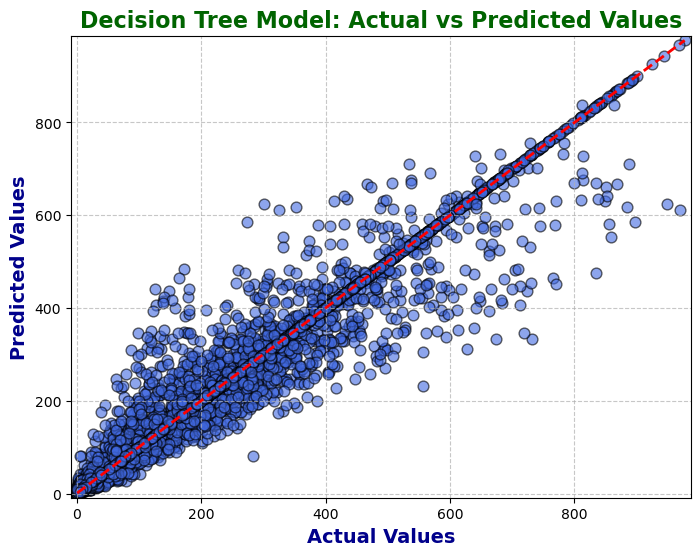

In [131]:
Y_train_values = Y_train.values  

plt.figure(figsize=(8, 6))
plt.scatter(Y_train_values, y_hat, color='royalblue', alpha=0.6, edgecolors='black', s=60)

plt.plot([min(Y_train_values), max(Y_train_values)], [min(Y_train_values), max(Y_train_values)], color='red', linewidth=2, linestyle='--')

plt.xlabel('Actual Values', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Predicted Values', fontsize=14, fontweight='bold', color='darkblue')
plt.title('Decision Tree Model: Actual vs Predicted Values', fontsize=16, fontweight='bold', color='darkgreen')

limit_min = min(min(Y_train_values), min(y_hat)) - 10
limit_max = max(max(Y_train_values), max(y_hat)) + 10

plt.xlim(limit_min, limit_max)
plt.ylim(limit_min, limit_max)

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [132]:
score_df = pd.DataFrame({'Actual Value': np.reshape(Y_train.values, (np.size(Y_train.values)),), 'Predicted Value': y_hat})
score_df['Predicted Value'] = score_df['Predicted Value'].round(0)
score_df['Difference'] = score_df['Actual Value'] - score_df['Predicted Value']
score_df['Diff %'] = np.absolute(score_df['Difference'] * 100 / score_df['Actual Value'])
score_df.head()

Actual Value  Predicted Value  Difference     Diff %
0            55             60.0        -5.0   9.090909
1           389            389.0         0.0   0.000000
2           415            415.0         0.0   0.000000
3           189            284.0       -95.0  50.264550
4           197            197.0         0.0   0.000000

In [133]:
score_df.describe()

Actual Value  Predicted Value   Difference       Diff %
count   7446.000000      7446.000000  7446.000000  7446.000000
mean     192.337900       192.331722     0.006178    21.116129
std      180.455227       175.373580    42.545417    71.322745
min        1.000000         1.000000  -323.000000     0.000000
25%       43.000000        43.000000     0.000000     0.000000
50%      147.000000       150.000000     0.000000     0.000000
75%      286.000000       289.000000     0.000000    17.656446
max      977.000000       977.000000   397.000000  1400.000000

In [134]:
mse_tree = mean_squared_error(Y_train, y_hat)
r2_tree = r2_score(Y_train, y_hat)

print(f'Decision Tree - Mean Squared Error (MSE): {mse_tree:.4f}')
print(f'Decision Tree - R-squared (R²): {r2_tree:.4f}')

Decision Tree - Mean Squared Error (MSE): 1809.8265
Decision Tree - R-squared (R²): 0.9444


In [135]:
y_pred = decision_tree_model.predict(X_test_scale)

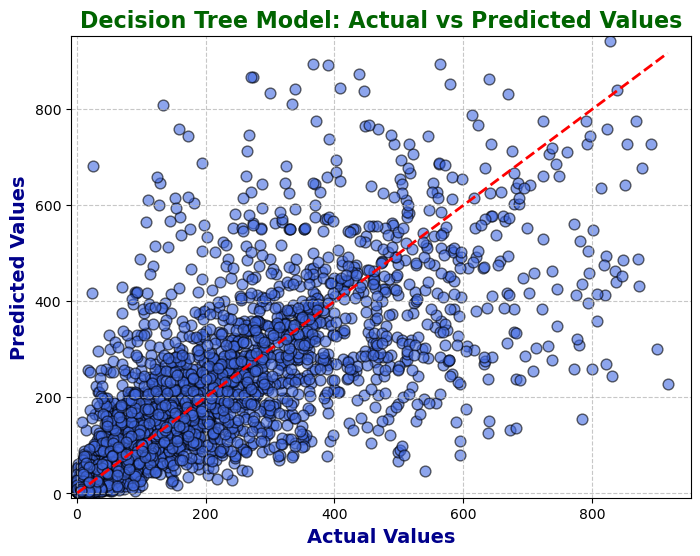

In [136]:
Y_test_values = Y_test.values  

plt.figure(figsize=(8, 6))
plt.scatter(Y_test_values, y_pred, color='royalblue', alpha=0.6, edgecolors='black', s=60)

plt.plot([min(Y_test_values), max(Y_test_values)], [min(Y_test_values), max(Y_test_values)], color='red', linewidth=2, linestyle='--')

plt.xlabel('Actual Values', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Predicted Values', fontsize=14, fontweight='bold', color='darkblue')
plt.title('Decision Tree Model: Actual vs Predicted Values', fontsize=16, fontweight='bold', color='darkgreen')

limit_min = min(min(Y_test_values), min(y_pred)) - 10
limit_max = max(max(Y_test_values), max(y_pred)) + 10

plt.xlim(limit_min, limit_max)
plt.ylim(limit_min, limit_max)

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [137]:
score_df = pd.DataFrame({'Actual Value': np.reshape(Y_test.values, (np.size(Y_test.values),)), 'Predicted Value': y_pred})
score_df['Predicted Value'] = score_df['Predicted Value'].round(0)
score_df['Difference'] = score_df['Actual Value'] - score_df['Predicted Value']
score_df['Diff %'] = np.absolute(score_df['Difference'] * 100 / score_df['Actual Value'])
score_df.head()

Actual Value  Predicted Value  Difference      Diff %
0           241             28.0       213.0   88.381743
1           281            281.0         0.0    0.000000
2           499             68.0       431.0   86.372745
3            49            192.0      -143.0  291.836735
4           381            461.0       -80.0   20.997375

In [138]:
score_df.describe()

Actual Value  Predicted Value   Difference       Diff %
count   3192.000000      3192.000000  3192.000000  3192.000000
mean     190.820802       189.581454     1.239348    85.912057
std      183.077485       174.084726   124.418151   217.454035
min        1.000000         1.000000  -675.000000     0.000000
25%       42.000000        44.000000   -38.000000    15.609867
50%      142.000000       149.500000    -1.000000    38.461538
75%      281.000000       279.000000    35.000000    72.611259
max      917.000000       943.000000   690.000000  5200.000000

In [139]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, y_pred)
print(f'Decision Tree test - Mean Squared Error (MSE): {mse}')

r2 = r2_score(Y_test, y_pred)
print(f'Decision Tree test R-squared: {r2}')

Decision Tree test - Mean Squared Error (MSE): 15476.7048579694
Decision Tree test R-squared: 0.5381034663381705


## Random Forest

In [141]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


random_forest_model = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': np.arange(50, 1000, 50), 
    'max_depth': [10, 20, 30, None], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2'],  
}

random_search = RandomizedSearchCV(estimator=random_forest_model, 
                                   param_distributions=param_dist, 
                                   n_iter=100, 
                                   cv=5,  
                                   scoring='neg_mean_squared_error',  
                                   n_jobs=-1,  
                                   random_state=42)

random_search.fit(X_train_scale, Y_train)

y_hat = random_search.predict(X_train_scale)

mse = mean_squared_error(Y_train, y_hat)
r2 = r2_score(Y_train, y_hat)

print(f'Mean Squared Error (MSE) on test set: {mse}')
print(f'R² on test set: {r2}')


Mean Squared Error (MSE) on test set: 5458.058564912895
R² on test set: 0.8323677441316857


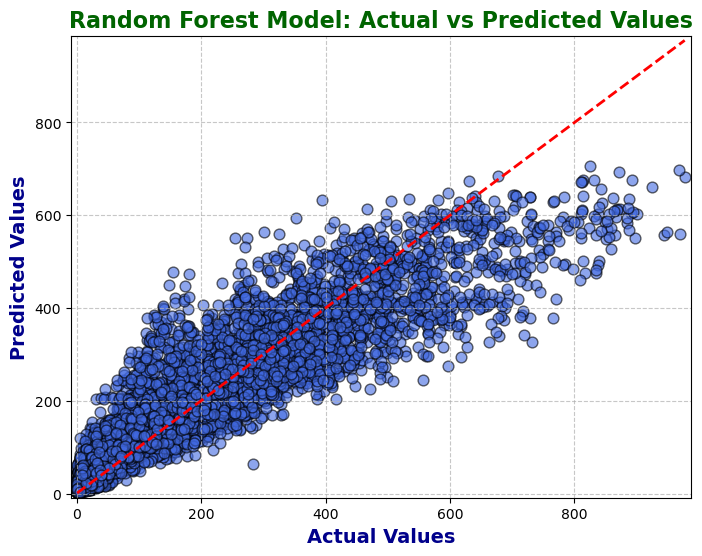

In [142]:
Y_train_values = Y_train.values  

plt.figure(figsize=(8, 6))
plt.scatter(Y_train_values, y_hat, color='royalblue', alpha=0.6, edgecolors='black', s=60)

plt.plot([min(Y_train_values), max(Y_train_values)], [min(Y_train_values), max(Y_train_values)], color='red', linewidth=2, linestyle='--')

plt.xlabel('Actual Values', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Predicted Values', fontsize=14, fontweight='bold', color='darkblue')
plt.title('Random Forest Model: Actual vs Predicted Values', fontsize=16, fontweight='bold', color='darkgreen')

limit_min = min(min(Y_train_values), min(y_hat)) - 10
limit_max = max(max(Y_train_values), max(y_hat)) + 10

plt.xlim(limit_min, limit_max)
plt.ylim(limit_min, limit_max)

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [143]:
score_df = pd.DataFrame({'Actual Value': np.reshape(Y_train.values, (np.size(Y_train.values)),), 'Predicted Value': y_hat})
score_df['Predicted Value'] = score_df['Predicted Value'].round(0)
score_df['Difference'] = score_df['Actual Value'] - score_df['Predicted Value']
score_df['Diff %'] = np.absolute(score_df['Difference'] * 100 / score_df['Actual Value'])
score_df.head()

Actual Value  Predicted Value  Difference     Diff %
0            55             67.0       -12.0  21.818182
1           389            213.0       176.0  45.244216
2           415            296.0       119.0  28.674699
3           189            296.0      -107.0  56.613757
4           197            224.0       -27.0  13.705584

In [144]:
score_df.describe()

Actual Value  Predicted Value  Difference       Diff %
count   7446.000000      7446.000000  7446.00000  7446.000000
mean     192.337900       192.392560    -0.05466    78.017894
std      180.455227       150.566812    73.88285   204.678285
min        1.000000         3.000000  -322.00000     0.000000
25%       43.000000        65.000000   -33.00000    11.542292
50%      147.000000       162.000000    -7.00000    25.537697
75%      286.000000       289.000000    22.00000    58.022335
max      977.000000       706.000000   410.00000  6100.000000

In [145]:

print("Best Parameters: ", random_search.best_params_)

best_random_forest_model = random_search.best_estimator_
y_pred = best_random_forest_model.predict(X_test_scale)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Squared Error (MSE) on test set: {mse}')
print(f'R² on test set: {r2}')


Best Parameters:  {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}
Mean Squared Error (MSE) on test set: 9088.991065629469
R² on test set: 0.7287424224843424


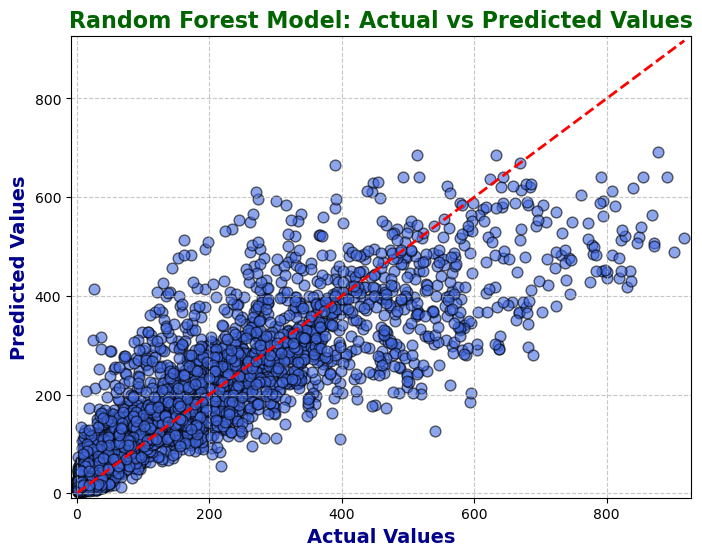

In [146]:
Y_test_values = Y_test.values  

plt.figure(figsize=(8, 6))
plt.scatter(Y_test_values, y_pred, color='royalblue', alpha=0.6, edgecolors='black', s=60)

plt.plot([min(Y_test_values), max(Y_test_values)], [min(Y_test_values), max(Y_test_values)], color='red', linewidth=2, linestyle='--')

plt.xlabel('Actual Values', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Predicted Values', fontsize=14, fontweight='bold', color='darkblue')
plt.title('Random Forest Model: Actual vs Predicted Values', fontsize=16, fontweight='bold', color='darkgreen')

limit_min = min(min(Y_test_values), min(y_pred)) - 10
limit_max = max(max(Y_test_values), max(y_pred)) + 10

plt.xlim(limit_min, limit_max)
plt.ylim(limit_min, limit_max)

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [147]:
score_df = pd.DataFrame({'Actual Value': np.reshape(Y_test.values, (np.size(Y_test.values),)), 'Predicted Value': y_pred})
score_df['Predicted Value'] = score_df['Predicted Value'].round(0)
score_df['Difference'] = score_df['Actual Value'] - score_df['Predicted Value']
score_df['Diff %'] = np.absolute(score_df['Difference'] * 100 / score_df['Actual Value'])
score_df.head()

Actual Value  Predicted Value  Difference      Diff %
0           241            156.0        85.0   35.269710
1           281            225.0        56.0   19.928826
2           499            215.0       284.0   56.913828
3            49            151.0      -102.0  208.163265
4           381            377.0         4.0    1.049869

In [148]:
score_df.describe()


Actual Value  Predicted Value   Difference       Diff %
count   3192.000000      3192.000000  3192.000000  3192.000000
mean     190.820802       190.664474     0.156328   102.573869
std      183.077485       147.109407    95.356060   249.042234
min        1.000000         3.000000  -387.000000     0.000000
25%       42.000000        72.000000   -42.000000    14.285714
50%      142.000000       160.000000    -9.000000    34.246575
75%      281.000000       281.000000    26.000000    81.661442
max      917.000000       691.000000   414.000000  4600.000000

### Detailed Observations

#### 1. **Support Vector Regression (SVR)**:
- **Train Performance**:
  - **MSE**: 17,560.13 (High error)
  - **R²**: 0.461 (Explains 46.1% of the variance in the training data)
- **Test Performance**:
  - **MSE**: 17,943.59 (High error, comparable to training error)
  - **R²**: 0.464 (Explains 46.4% of the variance in the test data)
- **Observation**:
  - SVR struggles to capture the patterns in the data, with relatively low R² values for both train and test datasets.
  - The small difference between train and test performance indicates no overfitting, but the overall performance is poor.

---

#### 2. **Linear Regression**:
- **Train Performance**:
  - **MSE**: 13,972.01 (Lower error compared to SVR)
  - **R²**: 0.571 (Explains 57.1% of the variance in the training data)
- **Test Performance**:
  - **MSE**: 14,376.30 (Slightly higher than train error)
  - **R²**: 0.571 (Explains 57.1% of the variance in the test data)
- **Observation**:
  - Linear Regression outperforms SVR with higher R² and lower MSE.
  - The consistent train and test performances suggest the model generalizes reasonably well but lacks the complexity to model non-linear relationships effectively.

---

#### 3. **Decision Tree**:
- **Train Performance**:
  - **MSE**: 1,809.83 (Extremely low error)
  - **R²**: 0.944 (Explains 94.4% of the variance in the training data)
- **Test Performance**:
  - **MSE**: 15,386.62 (Higher compared to train MSE)
  - **R²**: 0.541 (Explains only 54.1% of the variance in the test data)
- **Observation**:
  - The Decision Tree overfits the training data, achieving excellent performance on the train set.
  - It fails to generalize well to the test data, as reflected by the significant drop in R² and the sharp increase in MSE.

---

#### 4. **Random Forest**:
- **Train Performance**:
  - **MSE**: 5,458.06 (Low error)
  - **R²**: 0.832 (Explains 83.2% of the variance in the training data)
- **Test Performance**:
  - **MSE**: 9,088.99 (Reasonable compared to train error)
  - **R²**: 0.729 (Explains 72.9% of the variance in the test data)
- **Observation**:
  - Random Forest performs significantly better than other models, balancing low train error with strong test performance.
  - The performance gap between train and test datasets is smaller than that of the Decision Tree, indicating better generalization.

---

### Summary of Observations
1. **Best Generalization**:
   - **Random Forest** demonstrates the best balance between train and test performance, with an R² of 0.729 on the test set and a relatively low MSE. It captures complex patterns in the data effectively.

2. **Overfitting**:
   - **Decision Tree** overfits the training data, evident from the drastic difference between its train and test performances.

3. **Model Simplicity**:
   - **Linear Regression** shows consistent performance but fails to model non-linear relationships, limiting its predictive power.

4. **Poor Performance**:
   - **SVR** underperforms with high MSE and low R² values, making it unsuitable for this problem.

---

### Recommendation
- **Model to Use**: **Random Forest**
  - **Reason**: Random Forest provides the best combination of generalization and predictive power. With an R² of 0.729 and a relatively low MSE on the test set, it outperforms other models in capturing the variability and complexity of the bike rental data.
